In [ ]:
import json
import pandas as pd
import plotly.graph_objects as go
import pandas as pd

def draw_map(funding_data):
  # Read the JSON data from the file
  with open("/content/state_level_.txt", "r") as file:
      data = json.load(file)
  # Extract the features from the JSON data
  features = data["features"]
  # Initialize lists to store state names and coordinates
  state_abv=[]
  state_names = []
  coordinates = []
  # Extract state names and coordinates from features
  for feature in features:
    state_abv.append(feature["id"])
    state_names.append(feature["properties"]["name"])
    coordinates.append(feature["geometry"]["coordinates"])
  # Create a DataFrame from the extracted data
  usa_states = pd.DataFrame({  'org_state'   :state_abv,"State": state_names, "Coordinates": coordinates})
  # Display the DataFrame
  #display(usa_states.head())
  merged_data = usa_states.merge(funding_data, how='left', on='org_state')
  #merged_data.head()
  # Plot the choropleth map
  fig = go.Figure(go.Choropleth(
    geojson=merged_data.Coordinates,
    locations=merged_data.org_state,
    z=merged_data.total_cost1,
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title="Funding Cost",
    text= merged_data["org_state"],
  ))
  #fig.update_geos(showcountries=True, showcoastlines=True)
  fig.update_layout(
    title_text="State-Level Funding Costs in the United States",
    geo=dict(
        scope="usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor="rgb(255, 255, 255)"
      ),
  )
  fig.show()

In [ ]:
Years=['/content/2004.csv', '/content/2014.csv' ,'/content/2019.csv']
for i in Years:
   print(i)
   print('---------------------------------------------------------------------')
   funding_data=pd.read_csv(i)
   funding_data['org_state']=funding_data.apply(lambda x: x['org_state'].replace('"',''),axis=1)
   display(draw_map(funding_data))

/content/2004.csv
---------------------------------------------------------------------


None

/content/2014.csv
---------------------------------------------------------------------


None

/content/2019.csv
---------------------------------------------------------------------


None

In [ ]:
def draw_map_paper(funding_data):
  # Read the JSON data from the file
  with open("/content/state_level_.txt", "r") as file:
      data = json.load(file)
  # Extract the features from the JSON data
  features = data["features"]
  # Initialize lists to store state names and coordinates
  state_abv=[]
  state_names = []
  coordinates = []
  # Extract state names and coordinates from features
  for feature in features:
    state_abv.append(feature["id"])
    state_names.append(feature["properties"]["name"])
    coordinates.append(feature["geometry"]["coordinates"])
  # Create a DataFrame from the extracted data
  usa_states = pd.DataFrame({  'org_state'   :state_abv,"State": state_names, "Coordinates": coordinates})
  # Display the DataFrame
  #display(usa_states.head())
  merged_data = usa_states.merge(funding_data, how='left', on='org_state')
  #merged_data.head()
  # Plot the choropleth map
  fig = go.Figure(go.Choropleth(
    geojson=merged_data.Coordinates,
    locations=merged_data.org_state,
    #z=merged_data.num_papers / merged_data.total_cost1,
    z=merged_data.num_patent/ merged_data.total_cost1,
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title="Productivity",
    text= merged_data["org_state"],
  ))
  #fig.update_geos(showcountries=True, showcoastlines=True)
  fig.update_layout(
    title_text="State-Level Productivity in the United States",
    geo=dict(
        scope="usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor="rgb(255, 255, 255)"
      ),
  )
  fig.show()

In [ ]:
Years=['/content/2004_.csv']
for i in Years:
   print(i)
   print('---------------------------------------------------------------------')
   funding_data=pd.read_csv(i)
   funding_data['org_state']=funding_data.apply(lambda x: x['org_state'].replace('"',''),axis=1)
   display(draw_map(funding_data))
   display(draw_map_paper(funding_data) )

/content/2004_.csv
---------------------------------------------------------------------


None

None

In [ ]:
Years=['/content/2004__.csv']
for i in Years:
   print(i)
   print('---------------------------------------------------------------------')
   funding_data=pd.read_csv(i)
   funding_data['org_state']=funding_data.apply(lambda x: x['org_state'].replace('"',''),axis=1)
   display(draw_map(funding_data))
   display(draw_map_paper(funding_data) )

/content/2004__.csv
---------------------------------------------------------------------


None

None

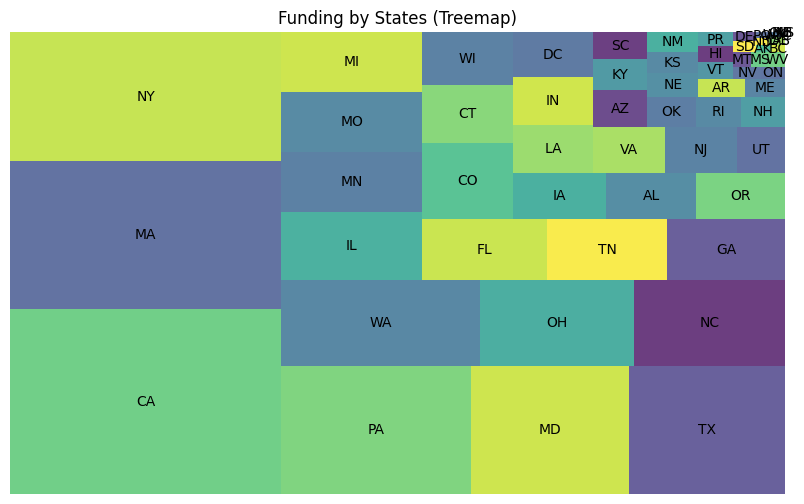

In [ ]:
funding_data=pd.read_csv('/content/1990.csv')
funding_data['org_state']=funding_data.apply(lambda x: x['org_state'].replace('"',''),axis=1)
funding_data = funding_data.sort_values(by='total_cost1', ascending=False)

funding_data.replace('', pd.NA, inplace=True)
funding_data.dropna(subset=['org_state', 'total_cost1'], inplace=True)

plt.figure(figsize=(10, 6))
squarify.plot(sizes=funding_data['total_cost1'], label=funding_data['org_state'], alpha=0.8)
plt.axis('off')
plt.title('Funding by States (Treemap)')
plt.show()

Institution_based

In [ ]:
!pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import squarify
def def_Institution_based(df,num):
     df=funding_data
     # Sort DataFrame by total_cost
     sorted_data = df.sort_values(by='total_cost1', ascending=False)
     df=sorted_data.head(num)
     # Plotting
     # Horizontal Bar Chart
     plt.figure(figsize=(10, 6))
     sns.barplot(x='total_cost1', y='org_name', data=df, palette='viridis')
     plt.xlabel('Total Cost ($)')
     plt.ylabel('Organization')
     plt.title('Funding by Organization')
     plt.tight_layout()
     plt.show()

def def_Institution_based_product(df,num):
     df=funding_data
     #df['num_papers']=df['num_papers']/  df['total_cost1']
     # Sort DataFrame by total_cost
     sorted_data = df.sort_values(by='num_papers', ascending=False)
     df=sorted_data.head(num)
     # Plotting
     # Horizontal Bar Chart
     plt.figure(figsize=(10, 6))
     sns.barplot(x='num_papers', y='org_name', data=df, palette='viridis')
     plt.xlabel('Productivity')
     plt.ylabel('Organization')
     plt.title('Productivity by Organization')
     plt.tight_layout()
     plt.show()

## Bubble Chart
#plt.figure(figsize=(10, 6))
#plt.scatter(df['total_cost1'], df.index, s=df['total_cost1']/1000000, alpha=0.5)
#plt.xlabel('Total Cost ($)')
#plt.ylabel('Organization Index')
#plt.title('Funding by Organization (Bubble Chart)')
#plt.tight_layout()
#plt.show()

/content/2004_.csv
---------------------------------------------------------------------


<ipython-input-23-f566ca7adbda>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




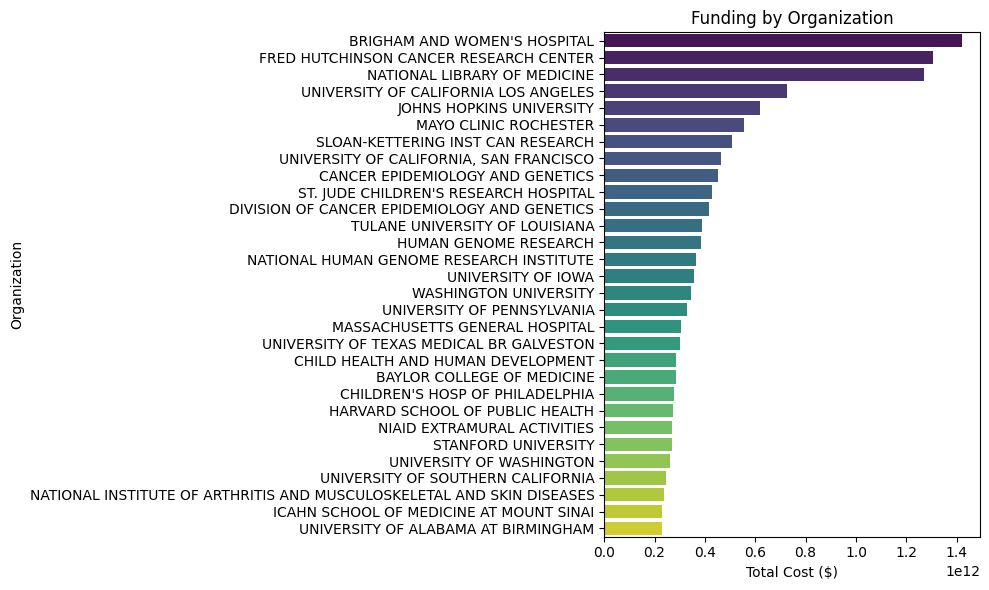

None

In [ ]:
#Years=['/content/2004.csv', '/content/2014.csv' ,'/content/2019.csv']
Years=['/content/2004_.csv']
for i in Years:
   print(i)
   print('---------------------------------------------------------------------')
   funding_data=pd.read_csv('/content/2004_.csv')
   funding_data['org_name']=funding_data.apply(lambda x:  x['org_name'].replace('"',''),axis=1)
   display(def_Institution_based(funding_data,30))

/content/2004_.csv
---------------------------------------------------------------------


<ipython-input-30-fdbf305df0e7>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




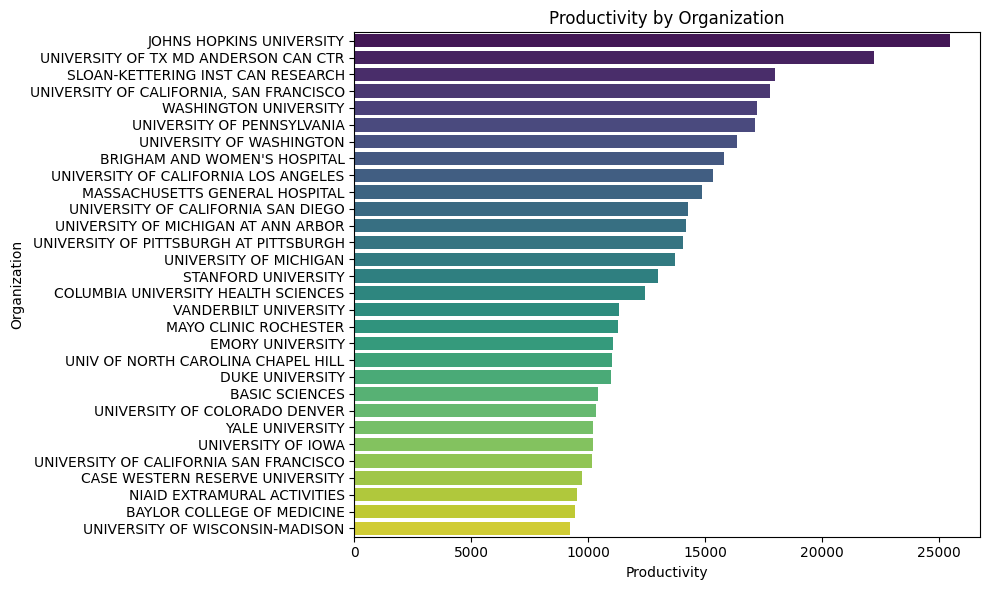

None

In [ ]:
Years=['/content/2004_.csv']
for i in Years:
   print(i)
   print('---------------------------------------------------------------------')
   funding_data=pd.read_csv('/content/2004_.csv')
   funding_data['org_name']=funding_data.apply(lambda x:  x['org_name'].replace('"',''),axis=1)
   display(def_Institution_based_product(funding_data,30))

# AI +  rare diseases

In [ ]:
Data=pd.read_csv('/content/publications.csv')
patent=pd.read_csv('/content/Patent.csv')[['GardId','num_patent']]
Clinical=pd.read_csv('/content/Clinical.csv')[['GardId','num_clinical']]
Data=Data.merge(patent, on= 'GardId').merge(Clinical, on= 'GardId')
prevalence=pd.read_csv('/content/Prevalence.csv')
incidence=pd.read_csv('/content/Incidence.csv')

In [ ]:
import re
import numpy as np

import re
import numpy as np

def extract_and_average_filtered_numbers(text):
    # Regular expression pattern to match numbers with optional commas and decimals
    pattern = r'(?<![\d.,])(\d+(?:,\d+)*(?:\.\d+)?)\s*(?:/|:)\s*(\d+(?:,\d+)*(?:\.\d+)?)(?![\d.,])'

    # Find all number patterns matching the pattern in the text
    numbers = re.findall(pattern, text)

    # Convert numbers to numerical format, calculate their values, and filter out values >= 0.0001
    calculated_numbers = [(float(num.replace(',', '')), float(denom.replace(',', ''))) for num, denom in numbers]
    values = [(numerator / denominator) for numerator, denominator in calculated_numbers if denominator != 0 and (numerator / denominator) < 0.0001]

    # Calculate the average of the filtered values
    if values:
        average_value = np.mean(values)
        return average_value
    else:
        return None

incidence['epidemiology_rates']=incidence.apply(lambda x: extract_and_average_filtered_numbers(x['epidemiology_rates']) ,axis=1)
prevalence['epidemiology_rates']=prevalence.apply(lambda x: extract_and_average_filtered_numbers(x['epidemiology_rates']) ,axis=1)
incidence=incidence[['GardId','epidemiology_rates']]

In [ ]:
Data=Data.merge(incidence, on= 'GardId')

Data['Funding']=Data['total_cost1']
Data=Data.drop(['total_cost1'],axis=1)
Data['outputs']=Data['num_papers']+Data['num_patent']+Data['num_clinical']
Data=Data.dropna()

Data=Data[['GardName','epidemiology_rates','Funding'	,'outputs']]
Data

GardName  epidemiology_rates  \
0                                            "Rabies"            0.000032   
3                                     "Aspergillosis"            0.000029   
4                                    "Cryptococcosis"            0.000018   
5                                   "Schistosomiasis"            0.000082   
7                                           "Malaria"            0.000035   
...                                               ...                 ...   
1793                       "Congenital analbuminemia"            0.000001   
1799  "Autosomal dominant spastic paraplegia type 17"            0.000022   
1801  "Nodular regenerative hyperplasia of the liver"            0.000010   
1804    "Combined malonic and methylmalonic acidemia"            0.000033   
1806                  "Adult-onset myasthenia gravis"            0.000013   

           Funding  outputs  
0      14812053960     9805  
3       9587692217    10708  
4      12282611640     5411  
5      19758492848    10534  
7     614888008804    63639  
...            ...      ...  
1793        193750        0  
1799      56671440       41  
1801     333095127      192  
1804     675003164      172  
1806     152487360       96  

[612 rows x 4 columns]

In [ ]:
Data['funding_per_paper'] = Data['Funding'] / Data['outputs']
Data['funding_per_affected_individual'] = Data['Funding'] / Data['epidemiology_rates']


# Handling infinite values resulting from division by zero
Data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill remaining NaNs with large number to indicate lack of activity
Data['funding_per_paper'].fillna(Data['Funding'].max(), inplace=True)
Data['funding_per_affected_individual'].fillna(Data['Funding'].max(), inplace=True)

# Rank diseases
#Data['rank_funding'] = Data['Funding'].rank()
Data['rank_funding_per_paper'] = Data['funding_per_paper'].rank()
Data['rank_funding_per_affected_individual'] = Data['funding_per_affected_individual'].rank()

# Composite rank (lower values indicate underfunding)
Data['composite_rank'] = (Data['rank_funding_per_paper'] + Data['rank_funding_per_affected_individual'] ) / 2

# Identify underfunded diseases
underfunded_diseases = Data.sort_values('composite_rank').head(10)
overfunded_diseases = Data.sort_values('composite_rank', ascending=False).head(10)

print("Underfunded Diseases:")
print(underfunded_diseases[['GardName', 'composite_rank']])

print("\nOverfunded Diseases:")
print(overfunded_diseases[['GardName', 'composite_rank']])

Underfunded Diseases:
                                               GardName  composite_rank
1709                "Twin to twin transfusion syndrome"             4.5
1525  "Brain demyelination due to methionine adenosy...             4.5
1484                      "Gestational choriocarcinoma"             4.5
1742         "Granulomatous disease, chronic, x-linked"             4.5
1259                                     "Histidinemia"             4.5
1708                                     "Macroglossia"            10.5
1482                                "Cranial neuralgia"            13.0
1726                        "Rare genetic skin disease"            18.0
1660  "Hypohidrotic ectodermal dysplasia-hypothyroid...            21.0
1398                          "Classic phenylketonuria"            22.0

Overfunded Diseases:
                                   GardName  composite_rank
8                            "Tuberculosis"           600.5
7                                 "Malaria" 

# Approved FDA drugs analysis

In [ ]:
import pandas as pd
Takeda=pd.read_csv('/content/6102.csv')
AstraZeneca=pd.read_csv('/content/7337.csv')
Johnson_Johnson	=pd.read_csv('/content/7501.csv')
Pfizer=pd.read_csv('/content/8732.csv')

Withdrawn_2010=pd.read_csv('/content/12757_acute myeloid leukemia_2010_DesignatedDesignation Withdrawn or Revoked.csv')
Designated_1998=pd.read_csv('/content/6400_Fabry disease_1998_Designated.csv')
Hemophilia_A_2014	=pd.read_csv('/content/6591_Hemophilia A_2014_approved.csv')
LGS_1993=pd.read_csv('/content/9912_Lennox-Gastaut syndrome_1993_approved.csv')

Takeda['Rare Disease']='CIDP_2024'   # Chronic inflammatory demyelinating polyneuropathy
AstraZeneca['Rare Disease']='PNH_2024'  #paroxysmal-nocturnal-hemoglobinuria
Johnson_Johnson['Rare Disease']='PAH_2024'     #pulmonary-arterial-hypertension
Pfizer['Rare Disease']='hemophilia-b_2024'

LGS_1993['Rare Disease']='LGS_1993'
Designated_1998['Rare Disease']='Designated_1998'
Hemophilia_A_2014['Rare Disease']='Hemophilia_A_2014'
Withdrawn_2010['Rare Disease']='Withdrawn_2010'


Takeda['FDA Approval']='Approved'   # Chronic inflammatory demyelinating polyneuropathy
AstraZeneca['FDA Approval']='Approved'  #paroxysmal-nocturnal-hemoglobinuria
Johnson_Johnson['FDA Approval']='Approved'     #pulmonary-arterial-hypertension
Pfizer['FDA Approval']='Approved'

LGS_1993['FDA Approval']='Approved'
Designated_1998['FDA Approval']='Designated'
Hemophilia_A_2014['FDA Approval']='Approved'
Withdrawn_2010['FDA Approval']='Withdrawn'
#[Takeda, AstraZeneca,Johnson_Johnson,Pfizer,LGS_1993,Designated_1998,Hemophilia_A_2014,Withdrawn_2010])
result = pd.concat([LGS_1993,Hemophilia_A_2014,Johnson_Johnson])
result.index=range(result.shape[0])
result


total_cost  funding_year  \
0        50000.0          2001   
1            NaN          2005   
2            NaN          1998   
3            NaN          1992   
4            NaN          1989   
...          ...           ...   
2402    432391.0          2006   
2403    786262.0          2007   
2404    201498.0          2011   
2405    165683.0          2018   
2406   1001028.0          2007   

                                            annotations Rare Disease  \
0     [["Electroencephalography", ["Diagnostic Proce...     LGS_1993   
1     [["Depression, Bipolar", ["Mental or Behaviora...     LGS_1993   
2     [["Glutamates", ["Amino Acid, Peptide, or Prot...     LGS_1993   
3     [["Epileptic encephalopathy", ["Disease or Syn...     LGS_1993   
4     [["Lennox-Gastaut syndrome", ["Disease or Synd...     LGS_1993   
...                                                 ...          ...   
2402  [["P-Selectin", ["Amino Acid, Peptide, or Prot...     PAH_2024   
2403  [["Viral Proteins", ["Amino Acid, Peptide, or ...     PAH_2024   
2404  [["Pulmonary arterial hypertension", ["Disease...     PAH_2024   
2405  [["Hypertensive disease", ["Disease or Syndrom...     PAH_2024   
2406  [["Lung Injury", ["Injury or Poisoning"]], ["L...     PAH_2024   

     FDA Approval  
0        Approved  
1        Approved  
2        Approved  
3        Approved  
4        Approved  
...           ...  
2402     Approved  
2403     Approved  
2404     Approved  
2405     Approved  
2406     Approved  

[2407 rows x 5 columns]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

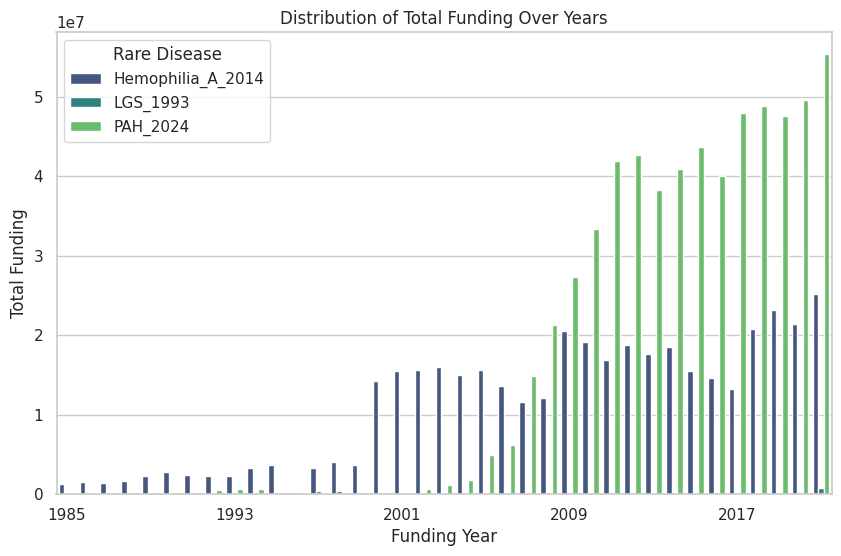

In [ ]:

df = result

# Group by funding_year and sum total_cost
df_grouped = df.groupby(['funding_year','Rare Disease'])['total_cost'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='funding_year', y='total_cost', hue='Rare Disease', data=df_grouped, palette='viridis')

# Plot the line
#plt.plot(df_grouped['funding_year'], df_grouped['total_cost'], color='red', marker='o')

# Set x-axis labels
plt.xlabel('Funding Year')
plt.ylabel('Total Funding')
plt.title('Distribution of Total Funding Over Years')

# Set x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))

plt.show()


<ipython-input-143-2fab89fa9d5a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


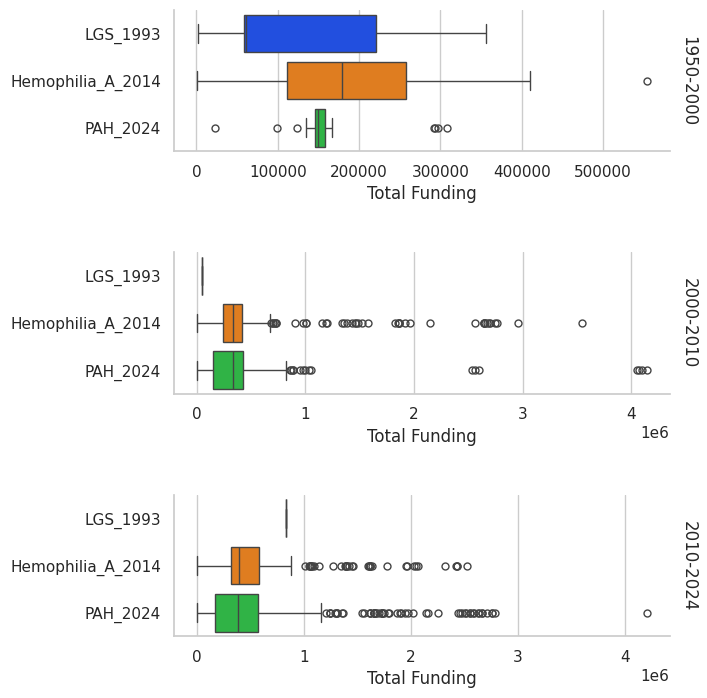

In [ ]:
#df_grouped = df.groupby('funding_year')['total_cost'].sum().reset_index()
# Create a new column for the year categories
def categorize_year(year):
    if year > 2010:
        return '2010-2024'
    elif 2000 <= year <= 2010:
        return '2000-2010'
    else:
        return '1950-2000'
order = ['1950-2000', '2000-2010', '2010-2024']

result['year_category'] = result['funding_year'].apply(categorize_year)

# Create the plot
g = sns.catplot(
    data=result,
    x='total_cost',y='Rare Disease', row='year_category',
    kind='box', orient='h', palette="bright",
    sharex=False, margin_titles=True,
    height=2.5, aspect=3, row_order=order
)

# Set labels and titles
g.set(xlabel='Total Funding', ylabel='')
g.set_titles(row_template='{row_name}')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the order of the categories
order = ['1950-2000', '2000-2010', '2010-2024']

# Create the plot
plt.figure(figsize=(10, 8))
for i, category in enumerate(order):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(
        data=result[result['year_category'] == category],
        x='total_cost', y='Rare Disease',
        color='skyblue',
        width=0.6,
        fliersize=2
    )
    plt.title(category)
    plt.xlabel('Total Funding')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

In [ ]:
sns.displot(result, x="funding_year", col='Approval',hue='Rare Disease', element="step")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame
sns.set(style="whitegrid")

# Create the plot
g = sns.displot(
    data=result,
    x="funding_year",
    col="FDA Approval",
    hue="Rare Disease",
    element="step",
    kind="hist",
    multiple="stack",
    palette="bright",
    height=4,
    aspect=1.2
)

# Add Total Funding on y-axis
for ax in g.axes.flatten():
    for c in ax.containers:
        labels = [int(v.get_height()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

# Adjust the plot to make it look nicer
g.set_axis_labels("Funding Year", "Number of Funding")
g.set_titles("{col_name} By FDA")
g.despine(left=True)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


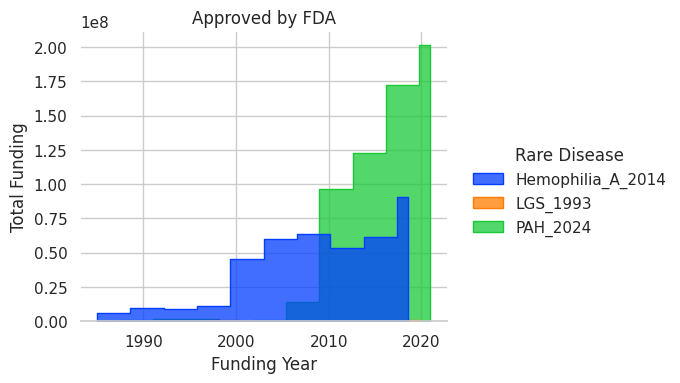

In [ ]:
grouped_result = result.groupby(['funding_year', 'FDA Approval', 'Rare Disease'], as_index=False)['total_cost'].sum()

sns.set(style="whitegrid")
# Define a custom lighter color palette
custom_palette = sns.color_palette("pastel")
# Create the plot
g = sns.displot(
    data=grouped_result,
    x="funding_year",
    weights="total_cost",
    col="FDA Approval",
    hue="Rare Disease",
    element="step",
    kind="hist",
    multiple="dodge",
    palette="bright",
    #palette=custom_palette,
    height=4,
    aspect=1.2
)

# Adjust the plot to make it look nicer
g.set_axis_labels("Funding Year", "Total Funding")
g.set_titles("{col_name} by FDA")
g.despine(left=True)

plt.show()

In [ ]:
#'After 2010'
#'2000-2010'
#'Before 2000'
result1=    result[result['year_category']=='After 2010']
sns.catplot(data=result1, x='funding_year', y='total_cost', hue='Rare Disease', kind='bar')

In [ ]:
result[result['year_category']=='After 2010']


In [ ]:
def categorize_year(year):
    if year > 2020:
        return '2020-2025'
    elif 2015 <= year <= 2020:
        return '2015-2020'
    elif 2010 <= year <= 2015:
        return '2010-2015'
    elif 2000 <= year <= 2010:
        return '2000-2010'
    elif 2000 <= year <= 2010:
        return '2000-2010'
    else:
        return '1950-2000'

result['year_category'] = result['funding_year'].apply(categorize_year)
grouped_result = result.groupby(['Rare Disease', 'year_category'], as_index=False)['annotations'].sum()
grouped_result

Rare Disease year_category  \
0   Hemophilia_A_2014     1950-2000   
1   Hemophilia_A_2014     2000-2010   
2   Hemophilia_A_2014     2010-2015   
3   Hemophilia_A_2014     2015-2020   
4   Hemophilia_A_2014     2020-2025   
5            LGS_1993     1950-2000   
6            LGS_1993     2000-2010   
7            LGS_1993     2020-2025   
8            PAH_2024     1950-2000   
9            PAH_2024     2000-2010   
10           PAH_2024     2010-2015   
11           PAH_2024     2015-2020   
12           PAH_2024     2020-2025   

                                          annotations  
0   [["F10 wt Allele", ["Gene or Genome"]], ["canc...  
1   [["Hemophilia A", ["Disease or Syndrome"]], ["...  
2   [["Blood Coagulation Disorders", ["Disease or ...  
3   [["Transgenes", ["Gene or Genome"]], ["Hemophi...  
4   [["F8 gene", ["Gene or Genome"]], ["Surgical R...  
5   [["Glutamates", ["Amino Acid, Peptide, or Prot...  
6   [["Electroencephalography", ["Diagnostic Proce...  
7   [["Lennox-Gastaut syndrome", ["Disease or Synd...  
8   [["rabbit allergenic extract", ["Amino Acid, P...  
9   [["ras Oncogene", ["Gene or Genome"]], ["Lung ...  
10  [["Pulmonary arterial hypertension", ["Disease...  
11  [["Pulmonary arterial hypertension", ["Disease...  
12  [["Heart Failure, Right-Sided", ["Disease or S...

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

def find_annotation_patterns(df, annotation_column):
    """
    Find patterns among annotations in a DataFrame column.

    Parameters:
    df (pd.DataFrame): DataFrame containing the annotations.
    annotation_column (str): The column name that contains the annotations.

    Returns:
    dict: A dictionary with entity types as keys and their counts as values.
    """
    # Initialize a dictionary to hold counts of each type of entity
    entity_counts = defaultdict(int)

    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        # Parse the annotation column which is assumed to be a string representation of a list
        try:
            annotations = ast.literal_eval(row[annotation_column])
        except (ValueError, SyntaxError):
            continue

        # Iterate over each annotation in the list
        for annotation in annotations:
            if isinstance(annotation, list) and len(annotation) == 2:
                # Extract the entity type(s)
                entity_types = annotation[1]
                for entity_type in entity_types:
                    entity_counts[entity_type] += 1

    return entity_counts

# Example usage
# Assuming `df` is your DataFrame and 'annotations' is the column containing the annotations
df = pd.DataFrame({
    'annotations': [
        "[['F10 wt Allele', ['Gene or Genome']], ['cancer procoagulant', ['Amino Acid, Peptide, or Protein', 'Enzyme']], ...]",
        "[['factor VIII', ['Amino Acid, Peptide, or Protein', 'Pharmacologic Substance', 'Biologically Active Substance']], ...]",
        # Add more rows as needed
    ]
})

patterns = find_annotation_patterns(df, 'annotations')
print(patterns)

defaultdict(<class 'int'>, {'Gene or Genome': 1, 'Amino Acid, Peptide, or Protein': 2, 'Enzyme': 1, 'Pharmacologic Substance': 1, 'Biologically Active Substance': 1})


In [ ]:
import re
from collections import Counter
# Define the list of categories to search for
categories = [
    "Gene or Genome",
    "Cell or Molecular Dysfunction",
    "Disease or Syndrome",
    "Amino Acid, Peptide, or Protein",
    "Immunologic Factor",
    "Receptor",
    "Enzyme",
    "Injury or Poisoning"
]

category_counter = Counter()

def find_number(text):
 # Iterate over the categories and count their occurrences in the text
  for category in categories:
    pattern = re.escape(category)
    matches = re.findall(pattern, text)
    category_counter[category] = len(matches)
  return dict(category_counter)
#find_number(grouped_result['annotations'][0])
grouped_result['Annot']=grouped_result.apply(lambda x:   find_number(x['annotations']), axis=1)

grouped_result.drop('annotations',axis=1)
new_data_frame=pd.DataFrame()
n=0
for i in grouped_result.index:
      Dic=grouped_result['Annot'][i]
      for j in  Dic:
             new_data_frame.at[n,'Rare Disease']= grouped_result['Rare Disease'][i]
             new_data_frame.at[n,'year_category']= grouped_result['year_category'][i]
             new_data_frame.at[n,'Annot_']= j
             new_data_frame.at[n,'number']=  Dic[j]
             n+=1
new_data_frame

Rare Disease year_category                           Annot_  number
0    Hemophilia_A_2014     1950-2000                   Gene or Genome   181.0
1    Hemophilia_A_2014     1950-2000    Cell or Molecular Dysfunction    21.0
2    Hemophilia_A_2014     1950-2000              Disease or Syndrome   536.0
3    Hemophilia_A_2014     1950-2000  Amino Acid, Peptide, or Protein   759.0
4    Hemophilia_A_2014     1950-2000               Immunologic Factor   122.0
..                 ...           ...                              ...     ...
99            PAH_2024     2020-2025  Amino Acid, Peptide, or Protein    87.0
100           PAH_2024     2020-2025               Immunologic Factor    10.0
101           PAH_2024     2020-2025                         Receptor    31.0
102           PAH_2024     2020-2025                           Enzyme    24.0
103           PAH_2024     2020-2025              Injury or Poisoning     2.0

[104 rows x 4 columns]

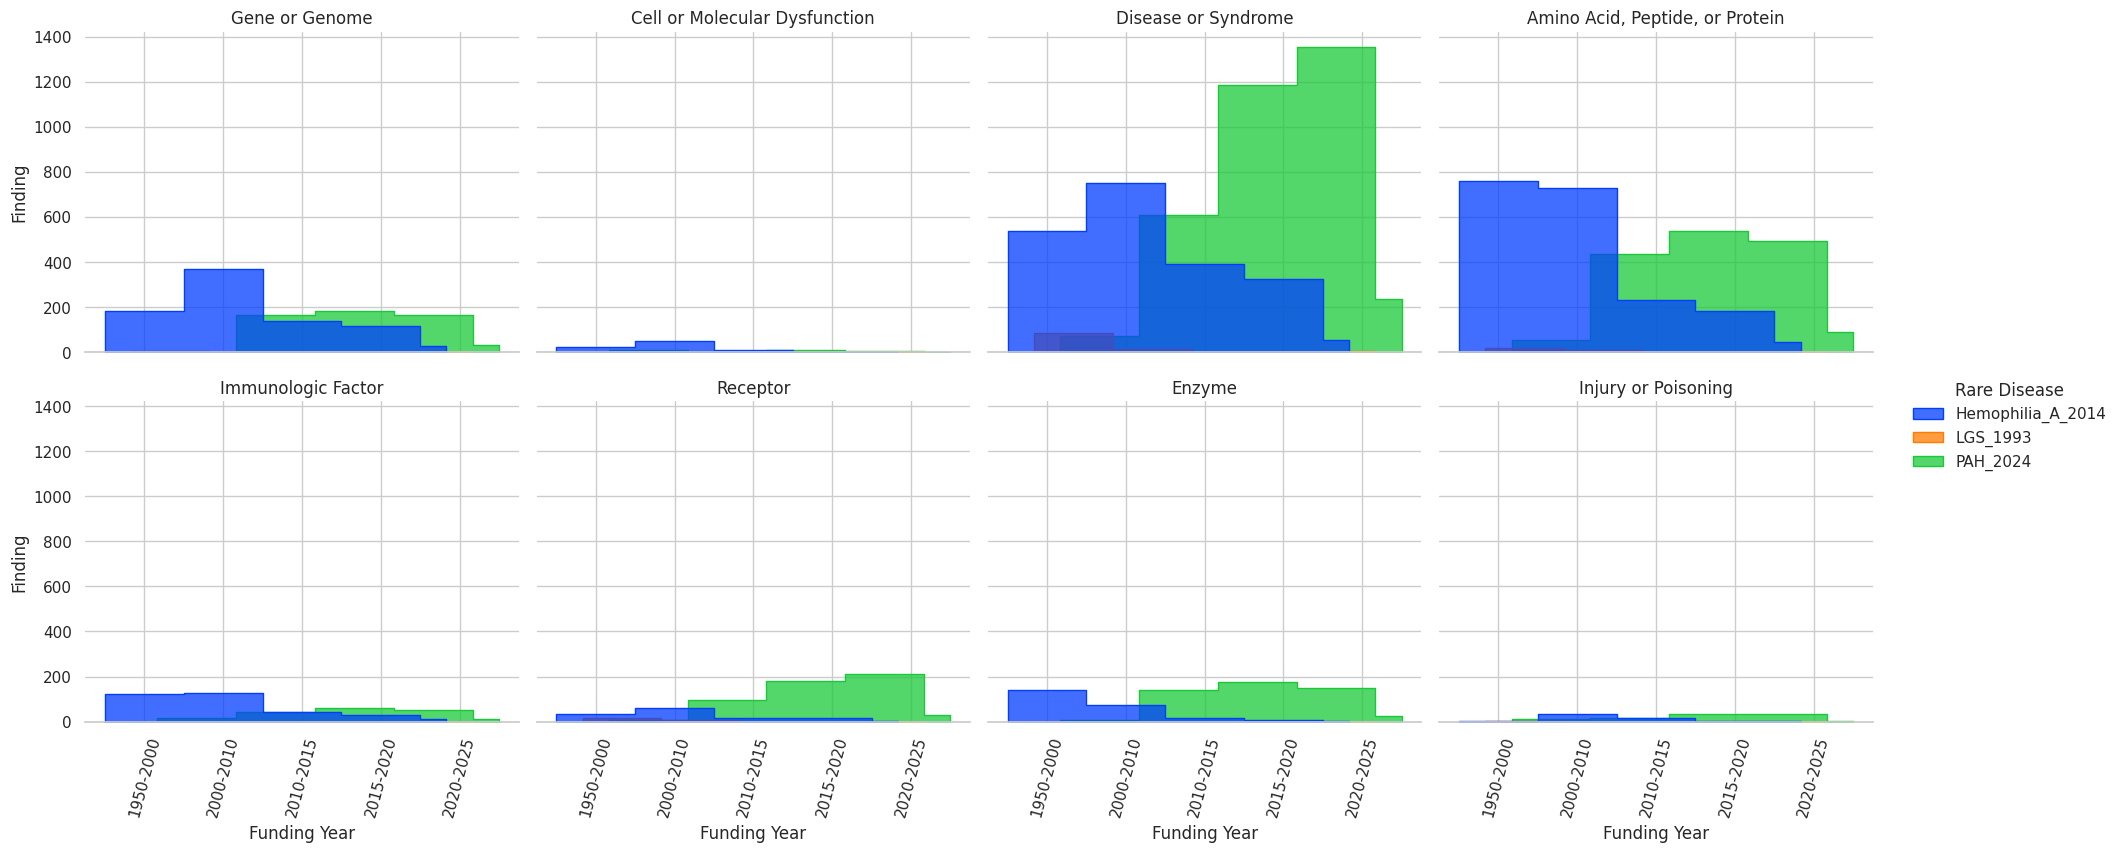

In [ ]:
sns.set(style="whitegrid")
# Define a custom lighter color palette
custom_palette = sns.color_palette("pastel")
# Create the plot
g = sns.displot(
    data=new_data_frame,
    x="year_category",
    weights="number",
    col="Annot_",
    hue="Rare Disease",
    element="step",
    kind="hist",
    multiple="dodge",
    palette="bright",
    #palette=custom_palette,
    height=4,
    aspect=1.2,
    col_wrap=4
)

# Adjust the plot to make it look nicer
g.set_axis_labels("Funding Year", "Finding")
g.set_titles("{col_name}")
g.despine(left=True)

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(75)

plt.show()

In [ ]:
import pandas as pd
LGS_1993_9912=pd.read_csv('/content/9912_frequncy.csv')
Hemophilia_A_2014_6591=pd.read_csv('/content/6591_frequency.csv')
Johnson_Johnson_PAH_7501	=pd.read_csv('/content/7501_frequency.csv')

LGS_1993_9912_word=pd.read_csv('/content/9912_word.csv')
Hemophilia_A_2014_6591_word=pd.read_csv('/content/6591_word.csv')
Johnson_Johnson_PAH_7501_word	=pd.read_csv('/content/7501_word.csv')

In [ ]:
Johnson_Johnson_PAH_7501.columns

Index(['total_cost', 'funding_year', 'Disease or Syndrome',
       'Mental or Behavioral Dysfunction', 'Amino Acid, Peptide, or Protein',
       'Pharmacologic Substance', 'Biologically Active Substance',
       'Congenital Abnormality', 'Hormone',
       'Nucleic Acid, Nucleoside, or Nucleotide', 'Antibiotic',
       'Neoplastic Process', 'Immunologic Factor', 'Diagnostic Procedure',
       'Gene or Genome', 'Enzyme', 'Organic Chemical',
       'Hazardous or Poisonous Substance',
       'Therapeutic or Preventive Procedure', 'Fungus',
       'Indicator, Reagent, or Diagnostic Aid', 'Bacterium',
       'Element, Ion, or Isotope', 'Virus', 'Receptor', 'Injury or Poisoning',
       'Cell or Molecular Dysfunction', 'Nucleotide Sequence',
       'Inorganic Chemical', 'Anatomical Abnormality', 'Sign or Symptom',
       'Experimental Model of Disease', 'Amino Acid Sequence',
       'Acquired Abnormality', 'Patient or Disabled Group', 'Clinical Drug',
       'Molecular Sequence', 'Intellectua

In [ ]:
Johnson_Johnson_PAH_7501_word[Johnson_Johnson_PAH_7501_word['Clinical Drug']> 0][['Clinical Drug']]

Empty DataFrame
Columns: [Clinical Drug]
Index: []

In [ ]:
display(Johnson_Johnson_PAH_7501.head())
display(Johnson_Johnson_PAH_7501_word.head())

total_cost  funding_year  Disease or Syndrome  \
0         0.0          2016                    0   
1         0.0          2017                    0   
2         0.0          2018                    0   
3         0.0          2019                    0   
4         0.0          2021                    0   

   Mental or Behavioral Dysfunction  Amino Acid, Peptide, or Protein  \
0                                 0                               34   
1                                 0                               35   
2                                 0                               25   
3                                 0                               30   
4                                 0                               27   

   Pharmacologic Substance  Biologically Active Substance  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Congenital Abnormality  Hormone  Nucleic Acid, Nucleoside, or Nucleotide  \
0                       0        0                                        0   
1                       0        0                                        0   
2                       0        0                                        0   
3                       0        0                                        0   
4                       0        0                                        0   

   ...  Experimental Model of Disease  Amino Acid Sequence  \
0  ...                              0                    0   
1  ...                              0                    0   
2  ...                              0                    0   
3  ...                              0                    0   
4  ...                              0                    0   

   Acquired Abnormality  Patient or Disabled Group  Clinical Drug  \
0                     0                          0              0   
1                     0                          0              0   
2                     0                          0              0   
3                     0                          0              0   
4                     0                          0              0   

   Molecular Sequence  Intellectual Product  Chemical  Vitamin  \
0                   0                     0         0        0   
1                   0                     0         0        0   
2                   0                     0         0        0   
3                   0                     0         0        0   
4                   0                     0         0        0   

   Biomedical or Dental Material  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 41 columns]

total_cost  funding_year    Disease or Syndrome  \
0         0.0          2016  "Anemia, Sickle Cell"   
1         0.0          2017  "Anemia, Sickle Cell"   
2         0.0          2018  "Anemia, Sickle Cell"   
3         0.0          2019  "Anemia, Sickle Cell"   
4         0.0          2021  "Anemia, Sickle Cell"   

  Mental or Behavioral Dysfunction Amino Acid, Peptide, or Protein  \
0                              NaN             "Androgen Receptor"   
1                              NaN             "Androgen Receptor"   
2                              NaN             "Androgen Receptor"   
3                              NaN             "Androgen Receptor"   
4                              NaN               "Antigens, CD147"   

  Pharmacologic Substance Biologically Active Substance  \
0  "4-aminohippuric acid"     "Cell Adhesion Molecules"   
1  "4-aminohippuric acid"     "Cell Adhesion Molecules"   
2  "4-aminohippuric acid"     "Cell Adhesion Molecules"   
3  "4-aminohippuric acid"     "Cell Adhesion Molecules"   
4  "4-aminohippuric acid"     "Cell Adhesion Molecules"   

       Congenital Abnormality Hormone  \
0                         NaN     NaN   
1                         NaN     NaN   
2  "Congenital Heart Defects"     NaN   
3  "Congenital heart disease"     NaN   
4  "Congenital heart disease"     NaN   

   Nucleic Acid, Nucleoside, or Nucleotide  ... Experimental Model of Disease  \
0                                      NaN  ...                           NaN   
1                                      NaN  ...                           NaN   
2                                      NaN  ...                           NaN   
3                                      NaN  ...                           NaN   
4                                      NaN  ...                           NaN   

  Amino Acid Sequence Acquired Abnormality Patient or Disabled Group  \
0                 NaN                  NaN                       NaN   
1                 NaN                  NaN                       NaN   
2                 NaN                  NaN                       NaN   
3                 NaN                  NaN                       NaN   
4                 NaN                  NaN                       NaN   

  Clinical Drug Molecular Sequence Intellectual Product Chemical Vitamin  \
0           NaN                NaN                  NaN      NaN     NaN   
1           NaN                NaN                  NaN      NaN     NaN   
2           NaN                NaN                  NaN      NaN     NaN   
3           NaN                NaN                  NaN      NaN     NaN   
4           NaN                NaN                  NaN      NaN     NaN   

  Biomedical or Dental Material  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  

[5 rows x 41 columns]

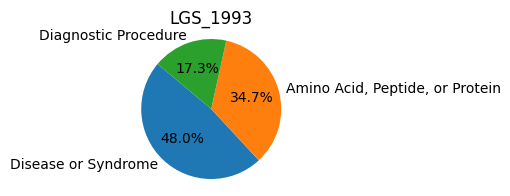

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(LGS_1993_9912.sum()[2:])
# Filter out categories with a value of 0
df_filtered = df[df[df.columns[0]] > 0]
# Create a pie chart
plt.figure(figsize=(3, 2))  # Smaller figure size
plt.pie(df_filtered[df_filtered.columns[0]], labels=df_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('LGS_1993')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

<ipython-input-45-cc7349a1a32c>:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


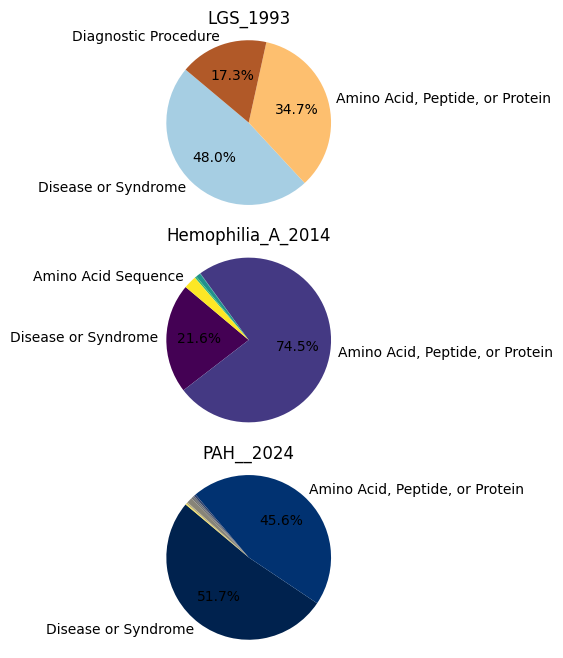

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Sample DataFrames (replace with your actual data)
df1 = pd.DataFrame(LGS_1993_9912.sum()[2:])
df2 = pd.DataFrame(Hemophilia_A_2014_6591.sum()[2:])
df3 = pd.DataFrame(Johnson_Johnson_PAH_7501.sum()[2:])

# Filter out categories with a value of 0 for each DataFrame
df1_filtered = df1[df1[df1.columns[0]] > 0]
df2_filtered = df2[df2[df2.columns[0]] > 0]
df3_filtered = df3[df3[df3.columns[0]] > 0]

# Custom autopct function to show labels only for values > 5%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''
def filter_labels(values, labels):
    total = sum(values)
    return [label if value/total > 0.02 else '' for value, label in zip(values, labels)]




# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(3, 8))  # 1 row, 3 columns

# Define colors for each pie chart
colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))

# Plot each pie chart
values1 = df1_filtered[df1_filtered.columns[0]]
labels1 = filter_labels(values1, df1_filtered.index)
axs[0].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1,autopct=autopct_func, startangle=140, colors=colors1)
axs[0].set_title('LGS_1993')

values1 = df2_filtered[df2_filtered.columns[0]]
labels1 = filter_labels(values1, df2_filtered.index)
axs[1].pie(df2_filtered[df2_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors2)
axs[1].set_title('Hemophilia_A_2014')

values1 = df3_filtered[df3_filtered.columns[0]]
labels1 = filter_labels(values1, df3_filtered.index)
axs[2].pie(df3_filtered[df3_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors3)
axs[2].set_title('PAH__2024')

# Equal aspect ratio ensures the pie chart is circular.
for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_combined_pie_chart(df,title_):
    # Initialize an empty DataFrame to store counts
    counts = pd.DataFrame(columns=['string', 'count', 'column'])

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Count the frequency of each string in the current column
        col_counts = df[col].value_counts().reset_index()
        col_counts.columns = ['string', 'count']
        col_counts['column'] = col
        # Append the counts to the combined DataFrame
        counts = pd.concat([counts, col_counts], ignore_index=True)

    # Add column name to the string for labels
    counts['label'] = counts['string']+'\n (' +counts['column']+')'

    # Sort counts by the 'count' column in descending order and keep the top 10
    counts = counts.sort_values(by='count', ascending=False).head(10)

    # Create a pie chart
    plt.figure(figsize=(9, 6))  # Set the figure size
    colors = plt.cm.Paired(np.linspace(0, 1, len(counts)))  # Define colors

    # Plot the pie chart
    plt.pie(counts['count'], labels=counts['label'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title_)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.tight_layout()
    plt.show()


#LGS_1993_9912_word=LGS_1993_9912_word.drop(['total_cost','funding_year'],axis=1)
#Johnson_Johnson_PAH_7501_word
create_combined_pie_chart(LGS_1993_9912_word,'')#'LGS_1993')

NameError: name 'LGS_1993_9912_word' is not defined

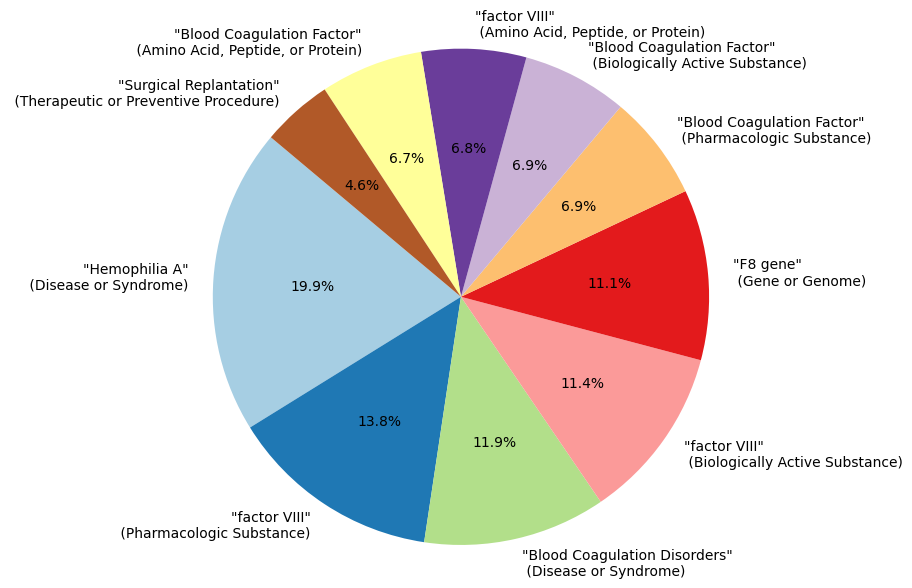

In [ ]:
#Hemophilia_A_2014_6591_word=Hemophilia_A_2014_6591_word.drop(['total_cost','funding_year'],axis=1)
create_combined_pie_chart(Hemophilia_A_2014_6591_word,'')#'Hemophilia_A_2014')

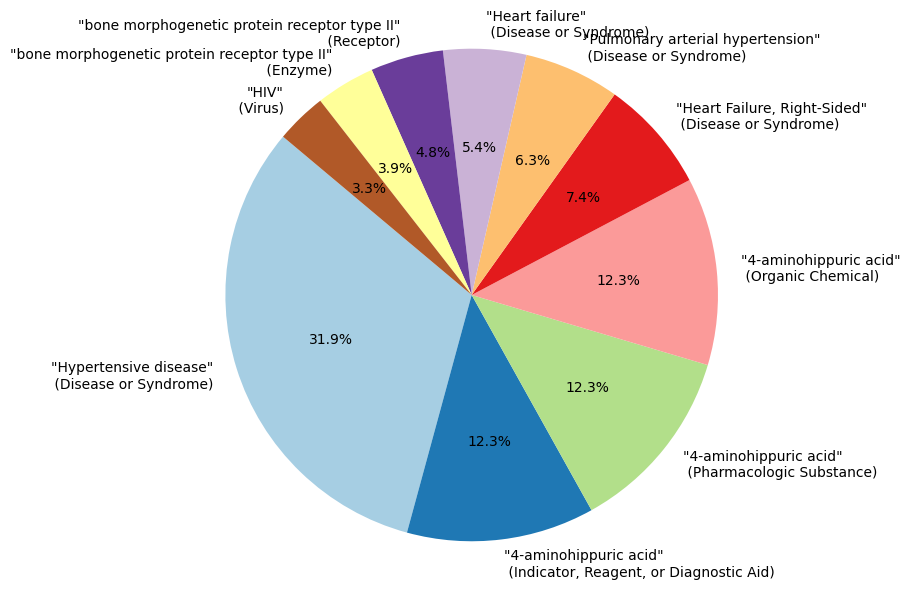

In [ ]:
#Johnson_Johnson_PAH_7501_word=Johnson_Johnson_PAH_7501_word.drop(['total_cost','funding_year'],axis=1)
create_combined_pie_chart(Johnson_Johnson_PAH_7501_word,'')#'PAH_2024')

# what rare disease recieves less funding or what recieves more funding

# FDA appoval

In [ ]:
import pandas as pd
FDA=pd.read_excel('/content/all_drug.xlsx')
FDA.columns

Index(['Generic Name', 'Trade Name', 'Date Designated', 'Orphan Designation',
       'Orphan Designation Status', 'Date Designation Withdrawn or Revoked',
       'FDA Orphan Approval Status', 'Approved Labeled Indication',
       'Marketing Approval Date', 'Exclusivity End Date',
       'Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)',
       'Sponsor Company', 'Sponsor Address 1', 'Sponsor Address 2',
       'Sponsor City', 'Sponsor State', 'Sponsor Zip', 'Sponsor Country',
       'CF Grid Key'],
      dtype='object')

In [ ]:
set(FDA[ 'Orphan Designation Status'].values)
set(FDA[ 'Orphan Designation Status'].values)

{'Designated',
 'Designated/Approved',
 'Designated/Approved/Designation Withdrawn or Revoked',
 'Designated/Designation Withdrawn or Revoked',
 nan}

In [ ]:
FDA[FDA[ 'Orphan Designation Status']=='Designated/Approved']

In [ ]:
approved_fda=FDA[FDA[ 'Orphan Designation Status']=='Designated/Approved']
designation_counts = approved_fda.groupby('Orphan Designation').size().reset_index(name='Frequency')
designation_counts_sorted = designation_counts.sort_values(by='Frequency', ascending=False)
designation_counts_sorted_list = list(designation_counts_sorted['Orphan Designation'])
print(designation_counts_sorted)#[:30])

                                    Orphan Designation  Frequency
557                      Treatment of multiple myeloma         33
375          Treatment of chronic myelogenous leukemia         13
368          Treatment of chronic lymphocytic leukemia         13
690       Treatment of pulmonary arterial hypertension         12
625         Treatment of patients with cystic fibrosis         11
..                                                 ...        ...
276  Treatment of Trypanosoma brucei gambiense infe...          1
277                Treatment of Type I Gaucher disease          1
279  Treatment of Wilson's disease excluding patien...          1
280                     Treatment of Wilson's disease.          1
787                   treatment of soft tissue sarcoma          1

[788 rows x 2 columns]


In [ ]:
designation_counts_sorted.to_excel('designation_counts_sorted.xlsx')

In [ ]:
designation_counts_sorted[designation_counts_sorted['Orphan Designation']=='Treatment of pancreatic cancer' ]

Orphan Designation  Frequency
606  Treatment of pancreatic cancer          3

In [ ]:
approved_fda=FDA[FDA[ 'Orphan Designation Status']== 'Designated/Designation Withdrawn or Revoked']
designation_counts = approved_fda.groupby('Orphan Designation').size().reset_index(name='Frequency')
designation_counts_sorted = designation_counts.sort_values(by='Frequency', ascending=False)
Withdrawn_counts_sorted_list = list(designation_counts_sorted['Orphan Designation'])
print(designation_counts_sorted[:30])

                                   Orphan Designation  Frequency
623                    Treatment of pancreatic cancer         26
312               Treatment of acute myeloid leukemia         22
571                     Treatment of multiple myeloma         21
616                       Treatment of ovarian cancer         20
374         Treatment of chronic lymphocytic leukemia         16
624                   Treatment of pancreatic cancer.         12
501        Treatment of idiopathic pulmonary fibrosis         12
483             Treatment of hepatocellular carcinoma          9
291  Treatment of acquired immunodeficiency syndrome.          8
699      Treatment of pulmonary arterial hypertension          8
762                   Treatment of systemic sclerosis          7
332        Treatment of amyotrophic lateral sclerosis          7
413                      Treatment of cystic fibrosis          7
414                     Treatment of cystic fibrosis.          7
304         Treatment of 

In [ ]:
designation_counts_sorted[designation_counts_sorted['Orphan Designation']=='Treatment of multiple myeloma' ]

Orphan Designation  Frequency
571  Treatment of multiple myeloma         21

In [ ]:
acquired immunodeficiency syndrome
retinitis pigmentosa        5694
glioblastoma multiforme
chronic sarcoidosis
primary sclerosing cholangitis     1280
malignant mesothelioma
facioscapulohumeral muscular dystrophy   9941
pediatric systemic lupus erythematosus
phenylalanine hydroxylase deficiency     7383
adrenocortical carcinoma               558
metastatic malignant melanoma
CLN Batten disease
congenital ichthyosis
systemic lupus erythematosus
inclusion body myositinhalation anthrax disease
inherited mitochondrial respiratory chain diseases
invasive coccidioidomycosis

In [ ]:
for i in Withdrawn_counts_sorted_list:
  if i not in designation_counts_sorted_list:
     print(i)

Treatment of acquired immunodeficiency syndrome.
Treatment of cystic fibrosis.
Treatment of multiple myeloma.
Treatment of retinitis pigmentosa
Treatment of idiopathic pulmonary fibrosis.
Treatment of glioblastoma multiforme
Treatment of myelodysplastic syndrome.
Treatment of Hemophilia A
Treatment of soft tissue sarcoma.
Treatment of Huntington's disease.
Treatment of juvenile rheumatoid arthritis.
Treatment of cutaneous T-cell lymphoma
Treatment of chronic sarcoidosis
Treatment of glioma
Treatment of primary sclerosing cholangitis
Treatment of malignant mesothelioma
Treatment of Tourette's syndrome.
Treatment of facioscapulohumeral muscular dystrophy
Treatment of AL amyloidosis
Treatment of Sickle Cell Disease
Treatment of diffuse large B-cell lymphoma.
Treatment of pediatric systemic lupus erythematosus
Treatment of pemphigus
Treatment of pemphigus vulgaris
Treatment of opiate addiction in opiate users.
Treatment of peripheral T-cell lymphoma
Treatment of phenylalanine hydroxylase d

In [ ]:
import pandas as pd

a_=pd.read_csv('/content/1280.csv')
b_=pd.read_csv('/content/558.csv')
c_=pd.read_csv('/content/5694.csv')
d_=pd.read_csv('/content/7383.csv')
e_=pd.read_csv('/content/9941.csv')


a=pd.read_csv('/content/1280.csv')
b=pd.read_csv('/content/558.csv')
c=pd.read_csv('/content/5694.csv')
d=pd.read_csv('/content/7383.csv')
e=pd.read_csv('/content/9941.csv')
def cal_n(x):
    return len(x)
list_=list(a.columns[2:])

for i in list_:
   a[i]=a.apply(lambda x:   cal_n(x[i]),axis=1)
   b[i]=b.apply(lambda x:   cal_n(x[i]),axis=1)
   c[i]=c.apply(lambda x:   cal_n(x[i]),axis=1)
   d[i]=d.apply(lambda x:   cal_n(x[i]),axis=1)
   e[i]=e.apply(lambda x:   cal_n(x[i]),axis=1)


In [ ]:
t,y,u=convert_years(a)

In [ ]:
u

0
Disease or Syndrome              318.0
Amino Acid, Peptide, or Protein   40.0
Congenital Abnormality            14.0
Injury or Poisoning                1.0
Anatomical Abnormality             1.0
Acquired Abnormality               1.0

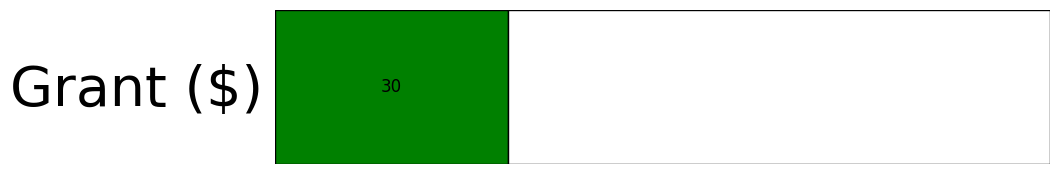

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_value_bar(value, max_value=100):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(10, 2))

    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, 1, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, 1, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 1)
    #ax.axis('off')
    ax.xaxis.set_visible(False)  # Hide y-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide x-axis ticks

    # Add x-axis label
    ylabel = ax.set_ylabel('Grant ($)', fontsize=40, labelpad=100)
    ylabel.set_position((-0.1, 0.3))
    ylabel.set_rotation(0)
    # Add the text to indicate the value
    ax.text(value_width / 2, 0.5, f'{value}', ha='center', va='center', color='black', fontsize=12)

    plt.show()

# Example usage
plot_value_bar(30)

In [ ]:

def convert_years(a):
    df1c=  a[a['funding_year']> 2010 ]
    df1b=  a[ (a['funding_year']< 2010) & (a['funding_year']> 1990) ]
    df1a=  a[a['funding_year']<1990  ]
    cost_a , cost_b  , cost_c = df1a['total_cost'].sum() , df1b['total_cost'].sum() , df1c['total_cost'].sum()
    df1, df2,  df3  =  pd.DataFrame(df1a.sum()[3:]), pd.DataFrame(df1b.sum()[3:]),  pd.DataFrame(df1c.sum()[3:])
    df1_filtered = df1[df1[df1.columns[0]] > 0]
    df2_filtered = df2[df2[df2.columns[0]] > 0]
    df3_filtered = df3[df3[df3.columns[0]] > 0]
    return df1_filtered,  df2_filtered ,df3_filtered,df1a.shape[0],df1b.shape[0], df1c.shape[0], cost_a , cost_b  , cost_c

158003113.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Custom autopct function to show labels only for values > 5%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 4 else ''
def filter_labels(values, labels):
    total = sum(values)
    return [label if value/total > 0.04 else '' for value, label in zip(values, labels)]
'''

def plot_year(a):
    df1_filtered,df2_filtered,df3_filtered,s1,s2,s3,cost_a , cost_b  , cost_c =convert_years(a)
    # Create subplots
    fig, axs = plt.subplots(1,3, figsize=(16, 3))  # 1 row, 3 columns
    # Define colors for each pie chart
    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))
    # Plot each pie chart
    values1 = df1_filtered[df1_filtered.columns[0]]
    labels1 = filter_labels(values1, df1_filtered.index)
    axs[0].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1,autopct=autopct_func, startangle=140, colors=colors1)
    axs[0].set_title(f'year <1990 ({s1} grants)')

    values1 = df2_filtered[df2_filtered.columns[0]]
    labels1 = filter_labels(values1, df2_filtered.index)
    axs[1].pie(df2_filtered[df2_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors2)
    axs[1].set_title(f'1990< year < 2010 ({s2} grants)')

    values1 = df3_filtered[df3_filtered.columns[0]]
    labels1 = filter_labels(values1, df3_filtered.index)
    axs[2].pie(df3_filtered[df3_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors3)
    axs[2].set_title(f'year >2010 ({s3} grants)')

    # Equal aspect ratio ensures the pie chart is circular.
    for ax in axs:
         ax.axis('equal')
    plt.tight_layout()
    plt.show()
plot_year(a)
'''

"\n\ndef plot_year(a):\n    df1_filtered,df2_filtered,df3_filtered,s1,s2,s3,cost_a , cost_b  , cost_c =convert_years(a)\n    # Create subplots\n    fig, axs = plt.subplots(1,3, figsize=(16, 3))  # 1 row, 3 columns\n    # Define colors for each pie chart\n    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))\n    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))\n    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))\n    # Plot each pie chart\n    values1 = df1_filtered[df1_filtered.columns[0]]\n    labels1 = filter_labels(values1, df1_filtered.index)\n    axs[0].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1,autopct=autopct_func, startangle=140, colors=colors1)\n    axs[0].set_title(f'year <1990 ({s1} grants)')\n\n    values1 = df2_filtered[df2_filtered.columns[0]]\n    labels1 = filter_labels(values1, df2_filtered.index)\n    axs[1].pie(df2_filtered[df2_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=c

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def plot_value_bar(ax, value, max_value=200000000):
    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Adjust the height of the rectangles
    height = 0.000000000005 * max_value  # Shorter height

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, height, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, height, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 0.005)
    #ax.axis('on')
    ax.xaxis.set_visible(False)  # Hide x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide y-axis ticks

    # Add y-axis label
    ylabel = ax.set_ylabel('Grant ($)', fontsize=40, labelpad=20)
    ylabel.set_rotation(0)
    #ylabel.set_position((-0.1, 0.3))

    # Add the text to indicate the value
    #ax.text(value_width / 2, height / 2, f'{value}', ha='center', va='center', color='black', fontsize=12)


def plot_year(a):
    df1_filtered, df2_filtered, df3_filtered, s1, s2, s3, cost_a, cost_b, cost_c = convert_years(a)

    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(20, 5), gridspec_kw={'height_ratios': [1, 3], 'hspace': -0.065})  # 3 rows, 3 columns

    # Define colors for each pie chart
    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))

    # Plot the value bars
    plot_value_bar(axs[0, 0], cost_a)
    plot_value_bar(axs[0, 1], cost_b)
    plot_value_bar(axs[0, 2], cost_c)

    # Remove axes for bar plots
    for i in range(3):
        axs[0, i].axis('off')

    # Plot each pie chart
    values1 = df1_filtered[df1_filtered.columns[0]]
    labels1 = filter_labels(values1, df1_filtered.index)
    axs[1, 0].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors1)
    axs[1, 0].set_title(f'Year < 1990 ({s1} grants)')

    values2 = df2_filtered[df2_filtered.columns[0]]
    labels2 = filter_labels(values2, df2_filtered.index)
    axs[1, 1].pie(df2_filtered[df2_filtered.columns[0]], labels=labels2, autopct=autopct_func, startangle=140, colors=colors2)
    axs[1, 1].set_title(f'Year 1990-2010 ({s2} grants)')

    values3 = df3_filtered[df3_filtered.columns[0]]
    labels3 = filter_labels(values3, df3_filtered.index)
    axs[1, 2].pie(df3_filtered[df3_filtered.columns[0]], labels=labels3, autopct=autopct_func, startangle=140, colors=colors3)
    axs[1, 2].set_title(f'Year > 2010 ({s3} grants)')

    plt.tight_layout()
    plt.show()
plot_year(a)
'''

"\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport matplotlib.patches as patches\n\ndef plot_value_bar(ax, value, max_value=200000000):\n    # Define the colors and positions\n    green_color = 'green'\n    white_color = 'white'\n    value_width = value\n    remaining_width = max_value - value\n\n    # Adjust the height of the rectangles\n    height = 0.000000000005 * max_value  # Shorter height\n    \n    # Add the green rectangle\n    green_rect = patches.Rectangle((0, 0), value_width, height, linewidth=1, edgecolor='black', facecolor=green_color)\n    ax.add_patch(green_rect)\n\n    # Add the white rectangle\n    white_rect = patches.Rectangle((value_width, 0), remaining_width, height, linewidth=1, edgecolor='black', facecolor=white_color)\n    ax.add_patch(white_rect)\n\n    # Set the limits and remove the axes\n    ax.set_xlim(0, max_value)\n    ax.set_ylim(0, 0.005)\n    #ax.axis('on')\n    ax.xaxis.set_visible(False)  # Hide x-axis\n    ax.spines

<ipython-input-158-c7526e73a649>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


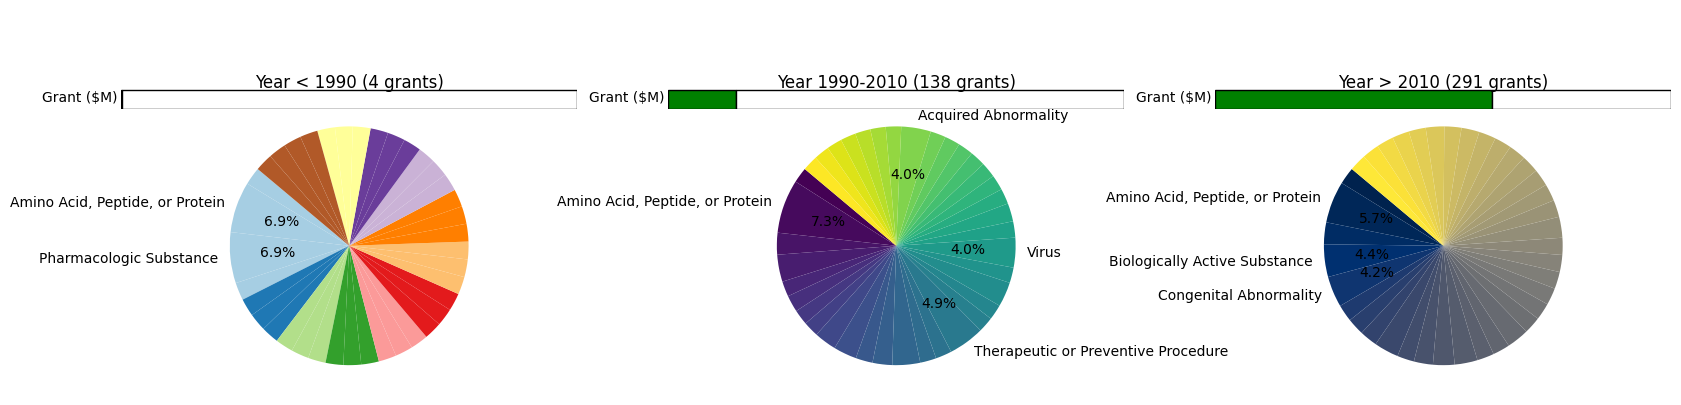

In [ ]:

def plot_value_bar(ax, value, max_value=200000000):
    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Adjust the height of the rectangles
    height = 0.000000000005 * max_value  # Shorter height

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, height, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, height, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 0.005)
    ax.xaxis.set_visible(False)  # Hide x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide y-axis ticks

    # Add y-axis label
    ylabel = ax.set_ylabel('Grant ($M)', fontsize=10, labelpad=30)  #'Grant ($20M)'
    ylabel.set_position((-0.1, 0.05))
    ylabel.set_rotation(0)

    # Add the text to indicate the value
    # ax.text(value_width / 2, height / 2, f'{value}', ha='center', va='center', color='black', fontsize=12)


def plot_year(a):
    df1_filtered, df2_filtered, df3_filtered, s1, s2, s3, cost_a, cost_b, cost_c = convert_years(a)

    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(20, 5), gridspec_kw={'height_ratios': [1, 3], 'hspace': -0.065})  # 2 rows, 3 columns

    # Define colors for each pie chart
    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))

    # Plot the value bars
    plot_value_bar(axs[0, 0], cost_a)
    plot_value_bar(axs[0, 1], cost_b)
    plot_value_bar(axs[0, 2], cost_c)

    # Remove axes for bar plots
    for i in range(3):
        axs[0, i].spines['top'].set_visible(False)
        axs[0, i].spines['right'].set_visible(False)
        axs[0, i].spines['left'].set_visible(False)
        axs[0, i].spines['bottom'].set_visible(False)
        axs[0, i].xaxis.set_visible(False)
        axs[0, i].set_yticks([])

    # Plot each pie chart
    values1 = df1_filtered[df1_filtered.columns[0]]
    labels1 = filter_labels(values1, df1_filtered.index)
    axs[1, 0].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors1)
    axs[1, 0].set_title(f'Year < 1990 ({s1} grants)')

    values2 = df2_filtered[df2_filtered.columns[0]]
    labels2 = filter_labels(values2, df2_filtered.index)
    axs[1, 1].pie(df2_filtered[df2_filtered.columns[0]], labels=labels2, autopct=autopct_func, startangle=140, colors=colors2)
    axs[1, 1].set_title(f'Year 1990-2010 ({s2} grants)')

    values3 = df3_filtered[df3_filtered.columns[0]]
    labels3 = filter_labels(values3, df3_filtered.index)
    axs[1, 2].pie(df3_filtered[df3_filtered.columns[0]], labels=labels3, autopct=autopct_func, startangle=140, colors=colors3)
    axs[1, 2].set_title(f'Year > 2010 ({s3} grants)')

    plt.tight_layout()
    plt.show()

plot_year(a)

primary sclerosing cholangitis     1280


<ipython-input-158-c7526e73a649>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


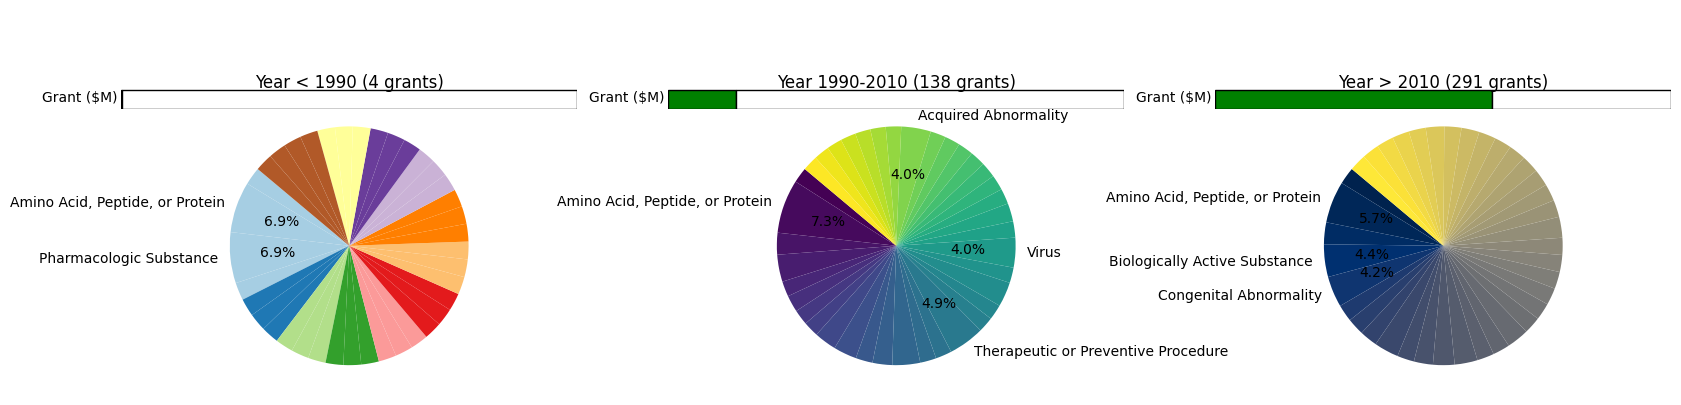

adrenocortical carcinoma               558


<ipython-input-158-c7526e73a649>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


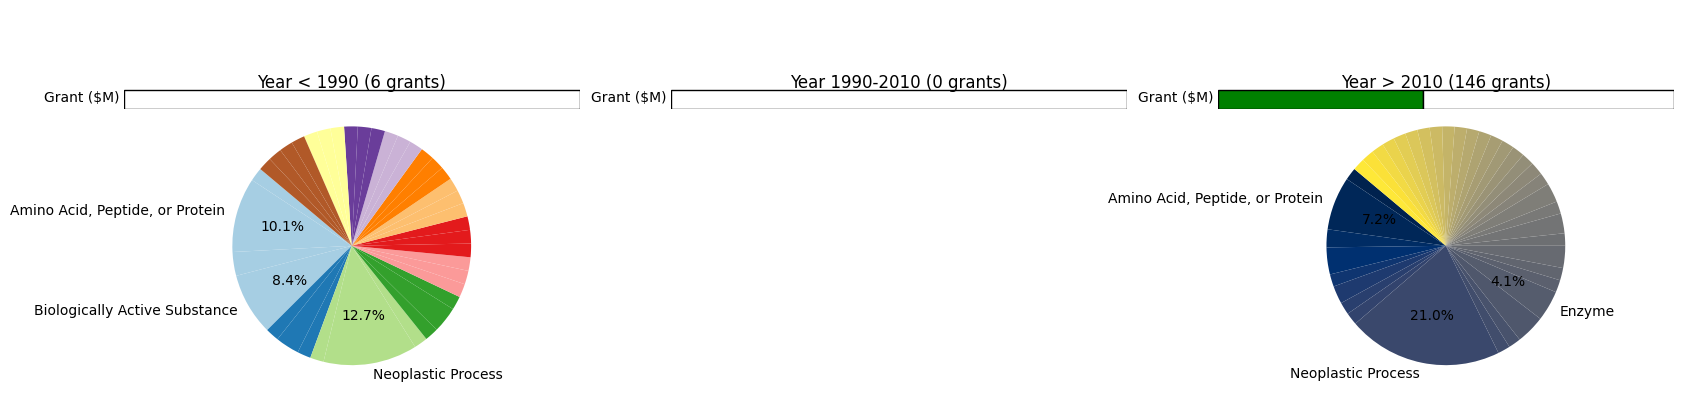

retinitis pigmentosa        5694


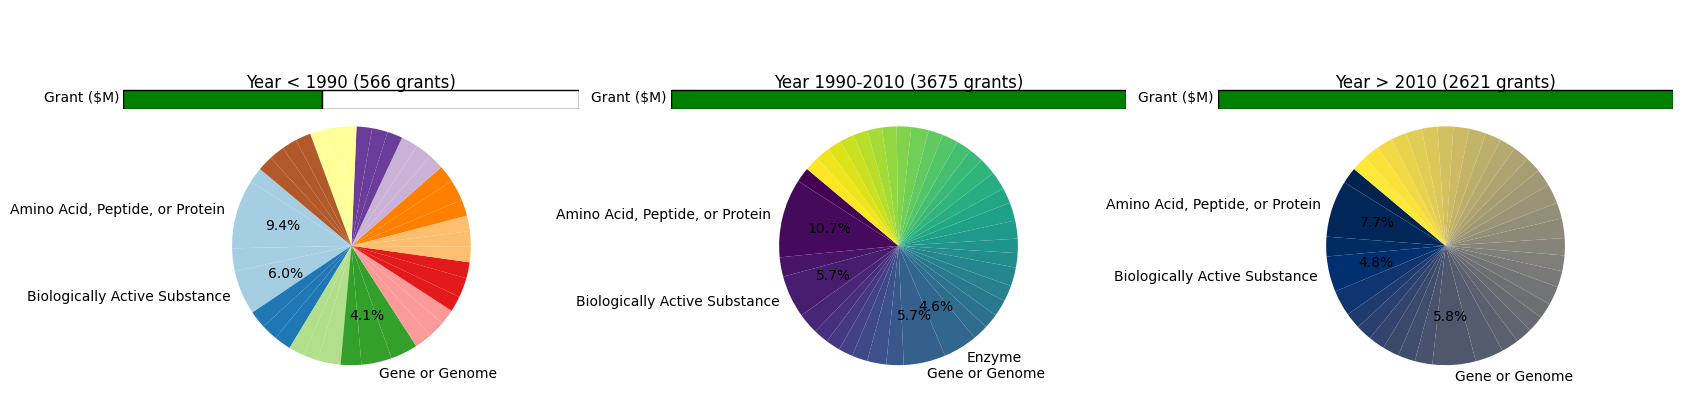

phenylalanine hydroxylase deficiency     7383


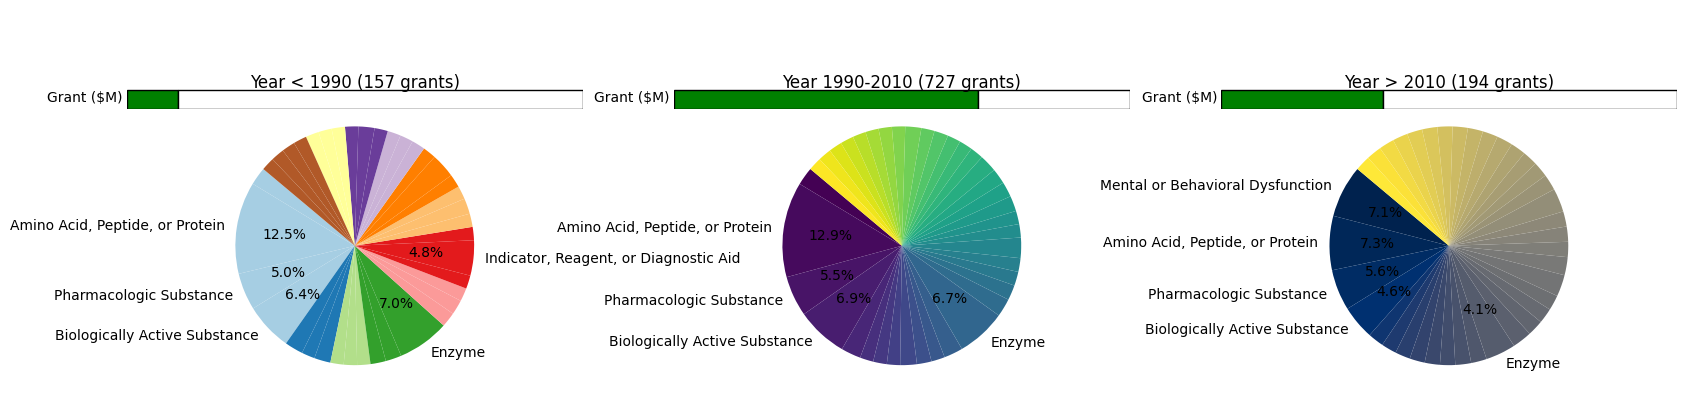

facioscapulohumeral muscular dystrophy   9941


<ipython-input-158-c7526e73a649>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


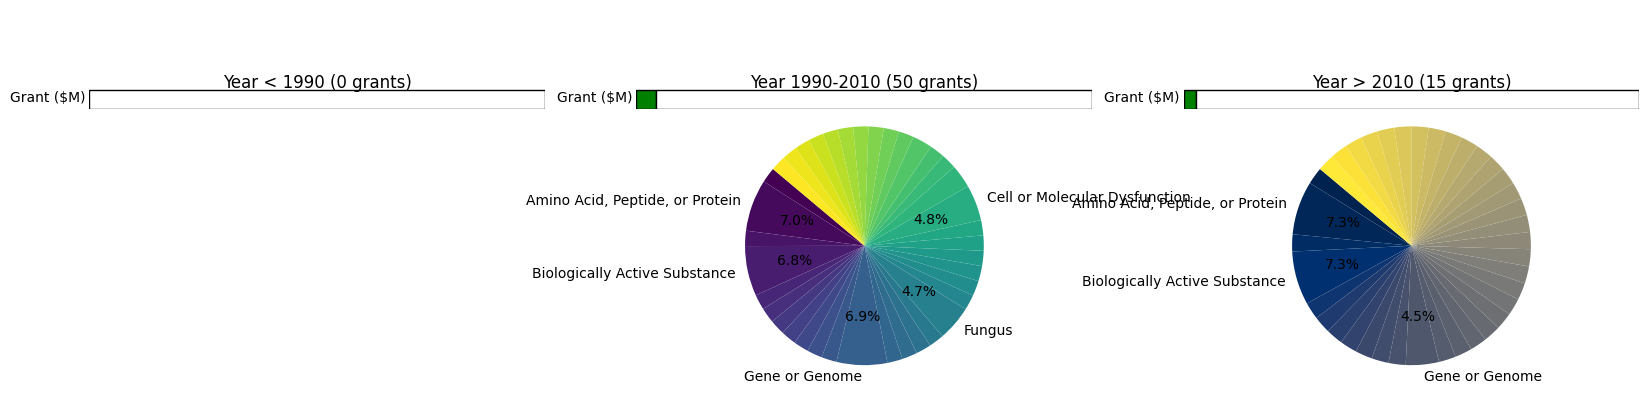

In [ ]:
print('primary sclerosing cholangitis     1280')
plot_year(a)
print('adrenocortical carcinoma               558')
plot_year(b)
print('retinitis pigmentosa        5694')
plot_year(c)
print('phenylalanine hydroxylase deficiency     7383')
plot_year(d)
print('facioscapulohumeral muscular dystrophy   9941')
plot_year(e)



# based on annotation

In [ ]:
import ast

def string_to_list(s):
    if type(s) ==str:
        # Use ast.literal_eval to safely evaluate the string to a Python object
        result = ast.literal_eval(s)
        # Check if the result is a list
        if isinstance(result, list):
            return result
        else: return None
    return None


list__  =list(a_.columns[2:])
for i in list__:
    a_[i]=a_.apply(lambda x:  string_to_list(x[i])  ,axis=1)
    b_[i]=b_.apply(lambda x:  string_to_list(x[i])  ,axis=1)
    c_[i]=c_.apply(lambda x:  string_to_list(x[i])  ,axis=1)
    d_[i]=d_.apply(lambda x:  string_to_list(x[i])  ,axis=1)
    e_[i]=e_.apply(lambda x:  string_to_list(x[i])  ,axis=1)


In [ ]:
from collections import Counter
def find_fequency(a_):
  a_words=dict()
  for i in list__:
        List=a_[i].apply(lambda x: x if isinstance(x, list) else []).sum()
        word_freq = Counter(List)
        word_freq = { (key, i): value for key, value in word_freq.items()}
        a_words.update(word_freq)
  return a_words
def convert_years(a):
    df1c=  a[a['funding_year']> 2010 ]
    df1b=  a[ (a['funding_year']< 2010) & (a['funding_year']> 1990) ]
    df1a=  a[a['funding_year']<1990  ]
    cost_a , cost_b  , cost_c = df1a['total_cost'].sum() , df1b['total_cost'].sum() , df1c['total_cost'].sum()

    return df1a,df1b, df1c,df1a.shape[0],df1b.shape[0], df1c.shape[0], cost_a , cost_b  , cost_c

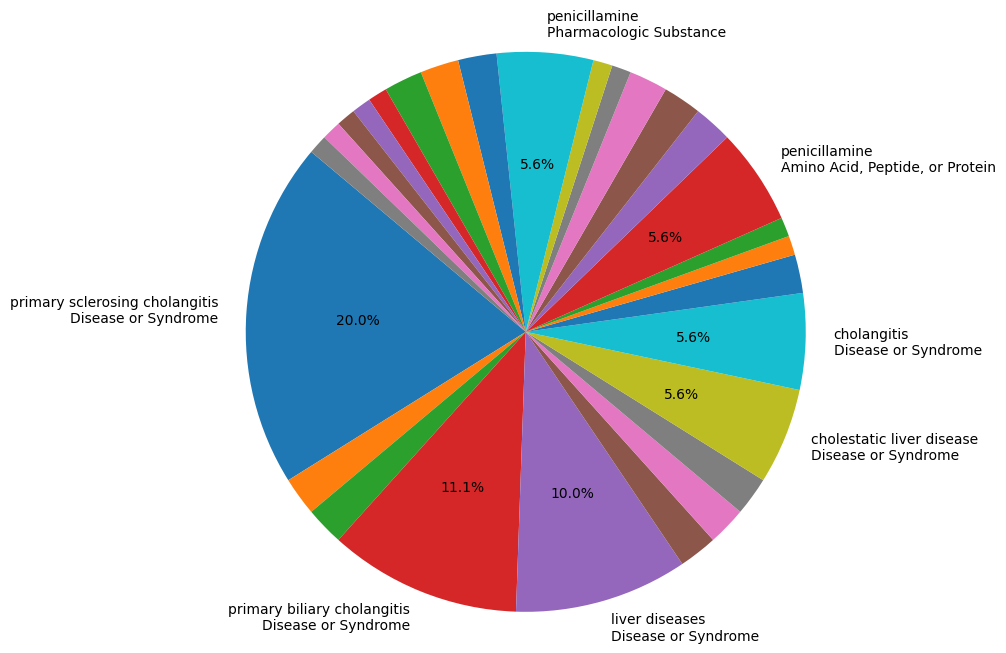

In [ ]:
import matplotlib.pyplot as plt


def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 4 else ''
def filter_labels(values, labels):
    total = sum(values)
    return [label if value/total > 0.04 else '' for value, label in zip(values, labels)]

def get_info(data):
    if len(data) > 0:
        total_count = sum(sum(v) for v in data.values())
        labels = []
        sizes = []
        for key, value in data.items():
            label = '\n'.join(key)
            labels.append(label)
            sizes.append(sum(value))
        labels__ = filter_labels(sizes, labels)
        return labels__, sizes
    else:
        return [], []

def one_plot(a_):
   df1_filtered, df2_filtered, df3_filtered, s1, s2, s3, cost_a, cost_b, cost_c = convert_years(a_)
   df1_filtered, df2_filtered, df3_filtered=find_fequency(df1_filtered),find_fequency(df2_filtered),find_fequency(df3_filtered)
   plt.figure(figsize=(10, 8))
   labels__, sizes=get_info(df1_filtered)
   plt.pie(sizes, labels=labels__, autopct=autopct_func, startangle=140)
   plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
   plt.show()
#df1_filtered, df2_filtered, df3_filtered,
one_plot(a_)

<ipython-input-244-45e9d51c15e7>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


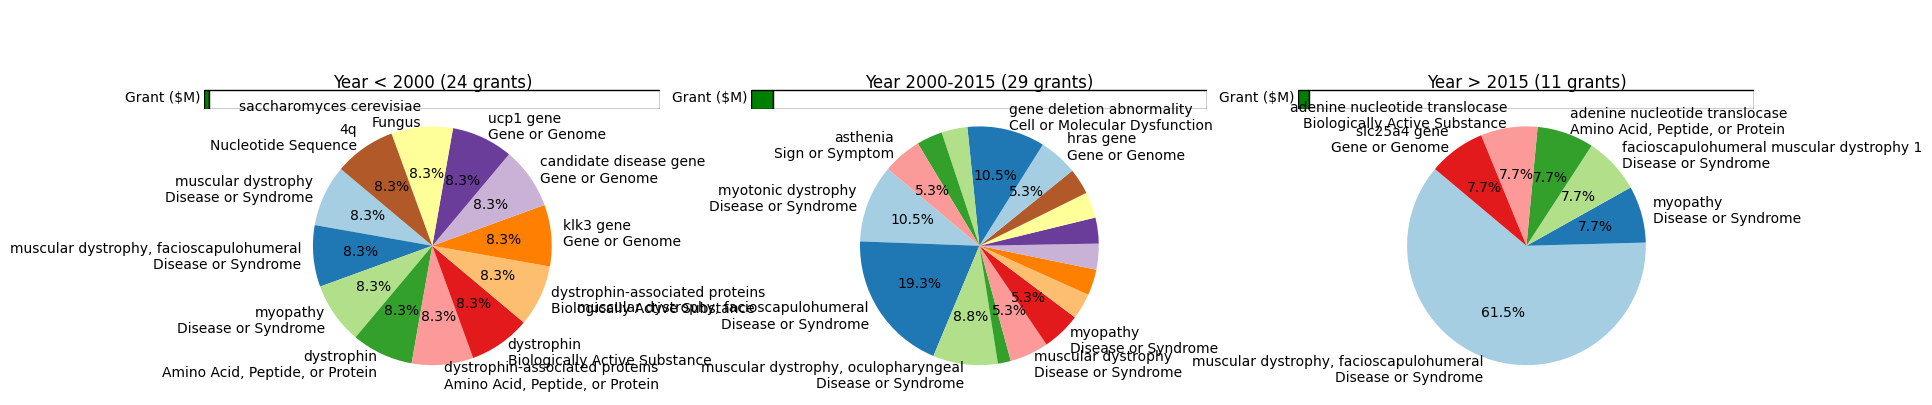

In [ ]:
from collections import Counter

def convert_years(a):
    df1c=  a[a['funding_year']> 2015 ]
    df1b=  a[ (a['funding_year']< 2015) & (a['funding_year']> 2000) ]
    df1a=  a[a['funding_year']<2000  ]
    cost_a , cost_b  , cost_c = df1a['total_cost'].sum() , df1b['total_cost'].sum() , df1c['total_cost'].sum()

    return df1a,df1b, df1c,df1a.shape[0],df1b.shape[0], df1c.shape[0], cost_a , cost_b  , cost_c




def find_fequency(df):
 if df.shape[0]>0:
    a_words = {}
    for i in df:
        List = df[i].apply(lambda x: x if isinstance(x, list) else []).sum()
        word_freq = Counter(List)
        word_freq = {(key, i): [value] for key, value in word_freq.items()}  # Ensure each value is a list
        a_words.update(word_freq)
    return a_words
 return {}
def plot_value_bar(ax, value, max_value=200000000):
    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Adjust the height of the rectangles
    height = 0.000000000005 * max_value  # Shorter height

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, height, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, height, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 0.005)
    ax.xaxis.set_visible(False)  # Hide x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide y-axis ticks

    # Add y-axis label
    ylabel = ax.set_ylabel('Grant ($M)', fontsize=10, labelpad=30)  #'Grant ($20M)'
    ylabel.set_position((-0.1, 0.05))
    ylabel.set_rotation(0)

    # Add the text to indicate the value
    # ax.text(value_width / 2, height / 2, f'{value}', ha='center', va='center', color='black', fontsize=12)


def plot_year(a):
    df1_filtered, df2_filtered, df3_filtered, s1, s2, s3, cost_a, cost_b, cost_c = convert_years(a)
    #df1_filtered, df2_filtered, df3_filtered=find_fequency(df1_filtered),find_fequency(df2_filtered),find_fequency(df3_filtered)
    df1_filtered= find_fequency(df1_filtered)
    df2_filtered=find_fequency(df2_filtered)
    df3_filtered=find_fequency(df3_filtered)


    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(20, 5), gridspec_kw={'height_ratios': [1, 3], 'hspace': -0.065})  # 2 rows, 3 columns

    # Define colors for each pie chart
    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))

    # Plot the value bars
    plot_value_bar(axs[0, 0], cost_a)
    plot_value_bar(axs[0, 1], cost_b)
    plot_value_bar(axs[0, 2], cost_c)

    # Remove axes for bar plots
    for i in range(3):
        axs[0, i].spines['top'].set_visible(False)
        axs[0, i].spines['right'].set_visible(False)
        axs[0, i].spines['left'].set_visible(False)
        axs[0, i].spines['bottom'].set_visible(False)
        axs[0, i].xaxis.set_visible(False)
        axs[0, i].set_yticks([])

    # Plot each pie chart
    labels__, sizes=get_info(df1_filtered)
    axs[1, 0].pie(sizes, labels=labels__, autopct=autopct_func, startangle=140,colors=colors1)
    axs[1, 0].set_title(f'Year < 2000 ({s1} grants)')


    labels__, sizes=get_info(df2_filtered)
    #if sizes is not None:
    axs[1, 1].pie(sizes, labels=labels__, autopct=autopct_func, startangle=140,colors=colors1)
    axs[1, 1].set_title(f'Year 2000-2015 ({s2} grants)')


    labels__, sizes=get_info(df3_filtered)
    axs[1, 2].pie(sizes, labels=labels__, autopct=autopct_func, startangle=140,colors=colors1)
    axs[1, 2].set_title(f'Year > 2015 ({s3} grants)')

    plt.tight_layout()
    plt.show()
    return df1_filtered,df2_filtered,df3_filtered

df1_filtered,df2_filtered,df3_filtered=plot_year(e_)

In [ ]:
df3_filtered

{('muscular dystrophy, facioscapulohumeral', 'Disease or Syndrome'): [8],
 ('myopathy', 'Disease or Syndrome'): [1],
 ('facioscapulohumeral muscular dystrophy 1', 'Disease or Syndrome'): [1],
 ('adenine nucleotide translocase', 'Amino Acid, Peptide, or Protein'): [1],
 ('adenine nucleotide translocase', 'Biologically Active Substance'): [1],
 ('slc25a4 gene', 'Gene or Genome'): [1]}

In [ ]:
a_=pd.read_csv('/content/1280.csv')
b_=pd.read_csv('/content/558.csv')
c_=pd.read_csv('/content/5694.csv')
d_=pd.read_csv('/content/7383.csv')
e_=pd.read_csv('/content/9941.csv')
retinitis pigmentosa        5694
primary sclerosing cholangitis     1280
facioscapulohumeral muscular dystrophy   9941
phenylalanine hydroxylase deficiency     7383
adrenocortical carcinoma               558

primary sclerosing cholangitis     1280


<ipython-input-242-fcbc9785f4a9>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


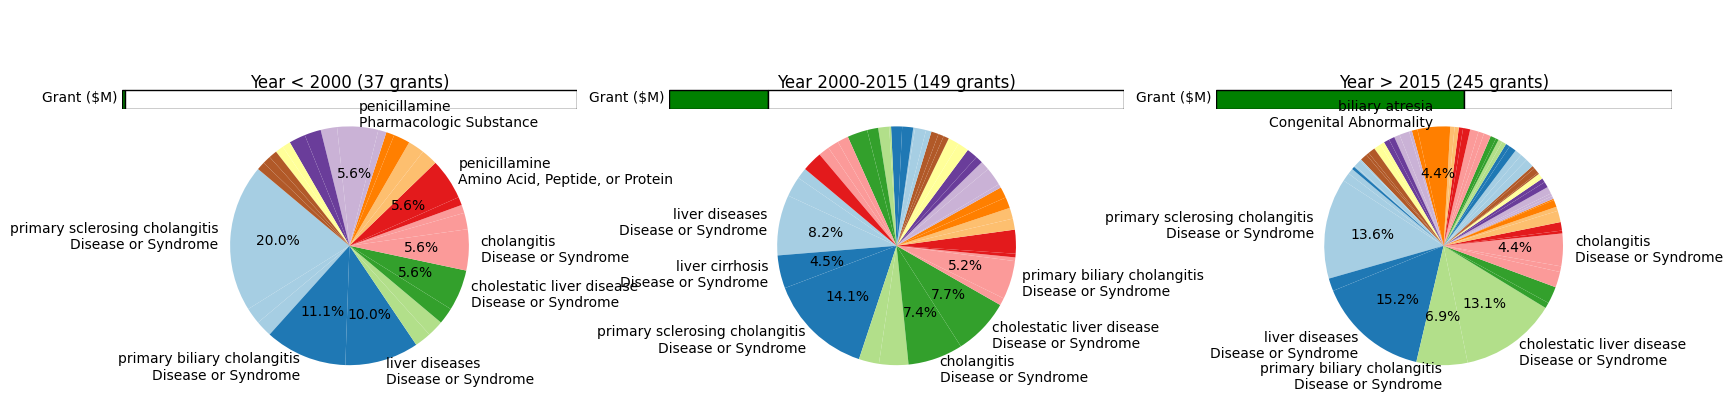

adrenocortical carcinoma               558


<ipython-input-242-fcbc9785f4a9>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


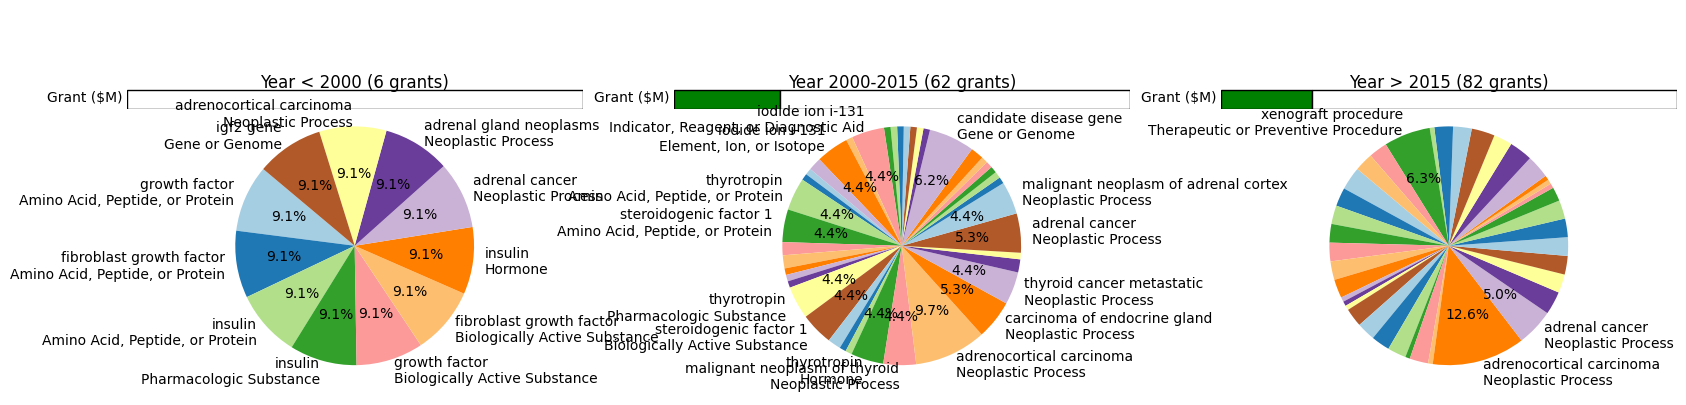

retinitis pigmentosa        5694


<ipython-input-242-fcbc9785f4a9>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


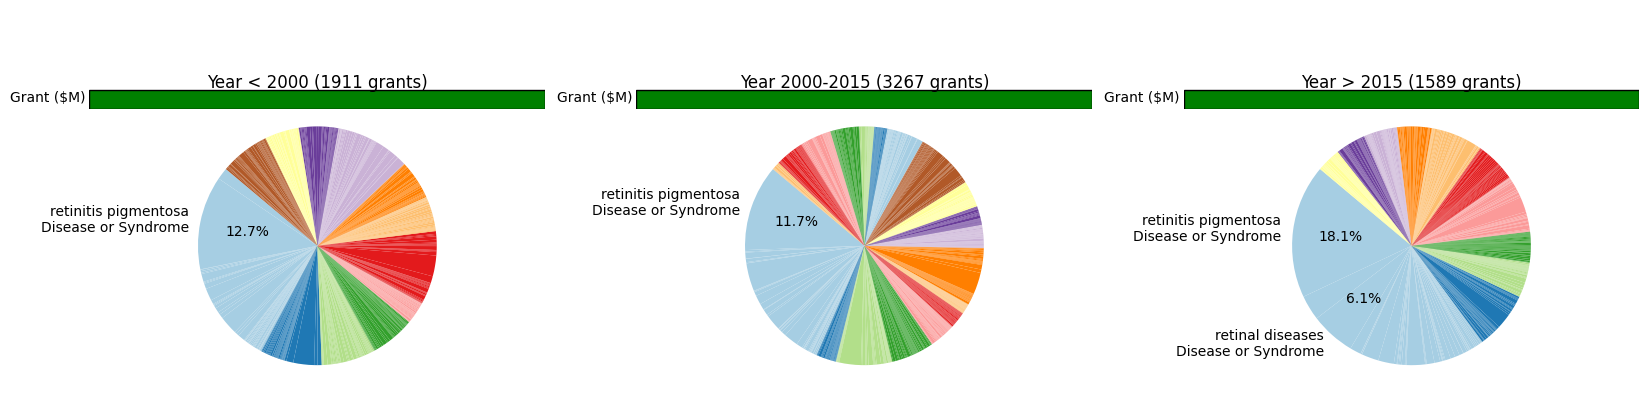

phenylalanine hydroxylase deficiency     7383


<ipython-input-242-fcbc9785f4a9>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


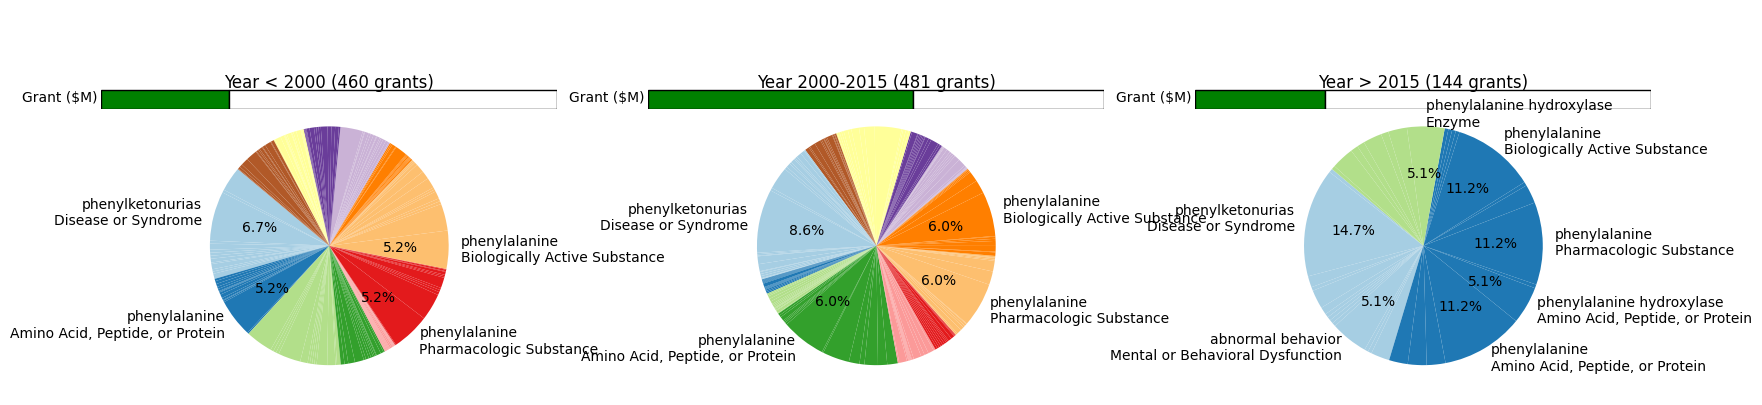

facioscapulohumeral muscular dystrophy   9941


<ipython-input-242-fcbc9785f4a9>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


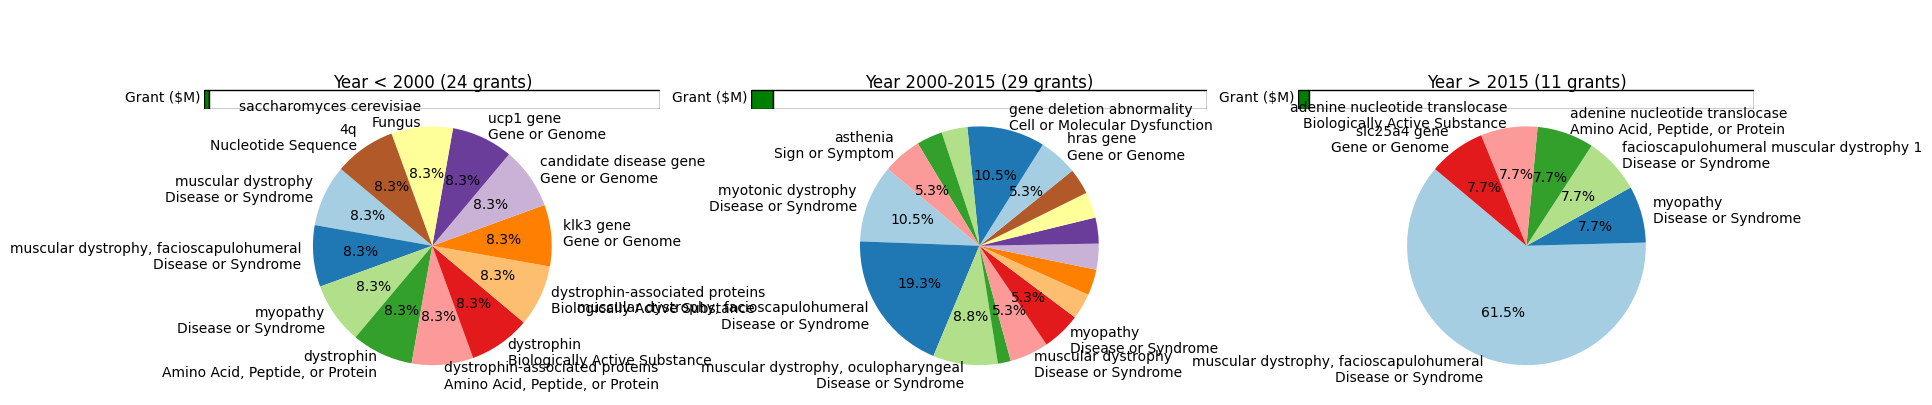

In [ ]:
print('primary sclerosing cholangitis     1280')
plot_year(a_)
print('adrenocortical carcinoma               558')
plot_year(b_)
print('retinitis pigmentosa        5694')
plot_year(c_)
print('phenylalanine hydroxylase deficiency     7383')
plot_year(d_)
print('facioscapulohumeral muscular dystrophy   9941')
plot_year(e_)